# Assignment: Used Car Price prediction

In this assignment, we are providing you the Used Car New Price dataset. The New Price is referenced via different features such as Year, Location, Brand, Model etc. The task is to predict New Price using Supervised Machine Learning alogorithms that has been learned so far. Built the model, submit the jupyter notebook and we will evaluate it.

**Independent Variables**

<br>`Location` - An identifier for each City
<br>`Year` - Calendar Year
<br>`Kilometers_Driven` - Odometer reading driven in Kilometers of a model
<br>`Fuel_Type` - Fuel Types of a model
<br>`Transmission` - Transmission type of a model
<br>`Owner_Type` - Owner Type of a model
<br>`Seats` - #of Seats of a model
<br>`mileage_num` - Mileage Number of a model
<br>`engine_num` - Engine Number of a model
<br>`power_num` - Power Number of a model
<br>`Brand` - Brand of a model
<br>`Model` - Model of a model
<br>`Price` - Price of a model

**Target Varible**

`New_Price` -  Predict New Price of a model

## Outline to modle and predict 'Used Car New Price'
    
1. [Import Libraries](#1)
2. [Variable Identification and Typecasting](#2)
3. [Exploratory Data Analysis (EDA)](#3)
    <br>[3.1 Univariate Analysis: Numerical Variables](#3.1)
    <br>[3.2 Univariate Analysis: Outliers](#3.2)
    <br>[3.3 Univariate Analysis: Categorical Varibales](#3.3)
    <br>[3.4 Univariate Analysis: Missing Values](#3.4)
    <br>[3.5 Bivariate Analysis : Numerical-Numerical](#3.5)
    <br>[3.6 Bivariate Analysis : Continuous - Categorical](#3.6)
        <br>- [3.6.1 Perform Anova Tests](#3.6.1)
        <br>- [3.6.2 Perform Two-Way Anova Tests](#3.6.2)
        <br>- [3.6.3 Perform 2-Sample Z and T Tests](#3.6.3)
    <br>[3.7 Bivariate Analysis : Categorical - Categorical](#3.7)
    <br>[3.8 Multivariate Analysis](#3.8)

## 1. Import Libraries<a id='1'></a>

In [1]:
# Import necessary Python modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import statsmodels.api as sm
import missingno as msno

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

print('Libraries imported')

Libraries imported


In [2]:
# Read used car data file and import as Pandas Dataframe

used_cars_df = pd.read_csv('Datasets/used_cars_data.csv')
used_cars_df.head()

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0      Mumbai  2010            72000.0       CNG       Manual      First   
1        Pune  2015            41000.0    Diesel       Manual      First   
2     Chennai  2011            46000.0    Petrol       Manual      First   
3     Chennai  2012            87000.0    Diesel       Manual      First   
4  Coimbatore  2013            40670.0    Diesel    Automatic     Second   

   Seats  mileage_num  engine_num  power_num    Brand   Model  New_Price  \
0    5.0        26.60       998.0      58.16   maruti   wagon       5.51   
1    5.0        19.67      1582.0     126.20  hyundai   creta      16.06   
2    5.0        18.20      1199.0      88.70    honda    jazz       8.61   
3    7.0        20.77      1248.0      88.76   maruti  ertiga      11.27   
4    5.0        15.20      1968.0     140.80     audi      a4      53.14   

   Price  
0   1.75  
1  12.50  
2   4.50  
3   6.00  
4  17.74

## 2. Variable Identification and Typecastingv<a id='2'></a>

In [3]:
# Check out Rows (Observations) and Columns (Features / Variables) of the dataset

used_cars_df.shape

(7252, 14)

In [4]:
# Review basic information of each column: datatypes, #of rows, null etc.

used_cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7252 entries, 0 to 7251
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7252 non-null   object 
 1   Year               7252 non-null   int64  
 2   Kilometers_Driven  7251 non-null   float64
 3   Fuel_Type          7252 non-null   object 
 4   Transmission       7252 non-null   object 
 5   Owner_Type         7252 non-null   object 
 6   Seats              7199 non-null   float64
 7   mileage_num        7169 non-null   float64
 8   engine_num         7206 non-null   float64
 9   power_num          7077 non-null   float64
 10  Brand              7252 non-null   object 
 11  Model              7252 non-null   object 
 12  New_Price          7252 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(7), int64(1), object(6)
memory usage: 793.3+ KB


In [5]:
# Typecasting of variables into 'Category' for having categorical values

used_cars_df['Location']     = used_cars_df['Location'].astype('category')
used_cars_df['Fuel_Type']    = used_cars_df['Fuel_Type'].astype('category')  
used_cars_df['Transmission'] = used_cars_df['Transmission'].astype('category') 
used_cars_df['Owner_Type']   = used_cars_df['Owner_Type'].astype('category') 
used_cars_df['Brand']        = used_cars_df['Brand'].astype('category') 
used_cars_df['Model']        = used_cars_df['Model'].astype('category')
used_cars_df['Seats']        = used_cars_df['Seats'].astype('category')

In [6]:
# Check datatypes of the variables after converting datatypes

used_cars_df.dtypes

Location             category
Year                    int64
Kilometers_Driven     float64
Fuel_Type            category
Transmission         category
Owner_Type           category
Seats                category
mileage_num           float64
engine_num            float64
power_num             float64
Brand                category
Model                category
New_Price             float64
Price                 float64
dtype: object

In [7]:
# Create logical groups of variables : Numerical and categorical

# Numerical groups
num_features        = ['Year', 'Kilometers_Driven', 'mileage_num', 'engine_num', 'power_num', 'New_Price', 'Price']
dist_features       = ['Kilometers_Driven', 'mileage_num']
engine_features     = ['engine_num', 'power_num']
price_features      = ['New_Price', 'Price']

# Categorical Groups
cat_features        = ['Location', 'Seats', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand', 'Model']
fuel_trans_type     = ['Fuel_Type', 'Transmission']
owner_seat_types    = ['Owner_Type', 'Seats']
brand_model_types   = [ 'Brand', 'Model']

In [8]:
# Summary of descriptive statistics of Numerical variables 

used_cars_df[num_features].describe()

Year  Kilometers_Driven  mileage_num   engine_num    power_num  \
count  7252.000000        7251.000000  7169.000000  7206.000000  7077.000000   
mean   2013.365830       57811.654255    18.346715  1616.590064   112.764474   
std       3.254405       37502.061260     4.158170   595.324779    53.497297   
min    1996.000000         171.000000     6.400000    72.000000    34.200000   
25%    2011.000000       34000.000000    15.300000  1198.000000    75.000000   
50%    2014.000000       53416.000000    18.200000  1493.000000    94.000000   
75%    2016.000000       73000.000000    21.100000  1968.000000   138.100000   
max    2019.000000      775000.000000    33.540000  5998.000000   616.000000   

         New_Price        Price  
count  7252.000000  6019.000000  
mean     21.308387     9.479468  
std      24.257816    11.187917  
min       3.910000     0.440000  
25%       7.880000     3.500000  
50%      11.300000     5.640000  
75%      21.697500     9.950000  
max     375.000000   160.000000

In [9]:
# Summary of descriptive statistics of Numerical and Categorical variables 

used_cars_df[cat_features].describe()

Location   Seats Fuel_Type Transmission Owner_Type   Brand  Model
count      7252  7199.0      7252         7252       7252    7252   7252
unique       11     8.0         5            2          4      32    218
top      Mumbai     5.0    Diesel       Manual      First  maruti  swift
freq        948  6047.0      3852         5203       5951    1444    418

## 3. Exploratory Data Analysis (EDA)<a id='3'></a>

### 3.1 Univariate Analysis: Numerical Variables<a id='3.1'></a>

In [10]:
# custom function for easy and efficient analysis of numerical variables

def UVA_numeric(data, var_group):
    ''' 
    Univariate_Analysis_numeric
    takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

    Runs a loop: calculate all the descriptives of i-th variable and plot/print it
    '''

    size = len(var_group)
    plt.figure(figsize = (7*size,4), dpi = 100)
    

    #looping for each variable
    for j,i in enumerate(var_group):
        mini = round(data[i].min(), 2)
        maxi = round(data[i].max(), 2)
        ran = round(data[i].max() - data[i].min(), 2)
        mean = round(data[i].mean(), 2)
        median = round(data[i].median(), 2)
        st_dev = round(data[i].std(), 2)
        skew = round(data[i].skew(), 2)
        kurt = round(data[i].kurtosis(), 2)

        # calculating points for range of data within one standard deviation from mean
        points = round(mean-st_dev, 2), round(mean+st_dev, 2)

        #Plotting the variable with every information, can change marker size in scatterplot(i.e. s=60)
        plt.subplot(1,size,j+1)
        sns.kdeplot(x=data[i], fill=True)
        sns.lineplot(x=points, y=[0,0], color = 'black', label = "within 1 std_dev")
        sns.scatterplot(x=[mini,maxi], y=[0,0], color = 'orange', label = f"min&max={mini}&{maxi}")
        sns.scatterplot(x=[mean], y=[0], color = 'red', label = f"mean={mean}")
        sns.scatterplot(x=[median], y=[0], color = 'blue', label = f"median={median}")
        plt.xlabel(f'{i}', fontsize = 20)
        plt.ylabel('density')
        plt.title(f'within 1 std_dev={points[0]} to {points[1]};kurtosis={kurt};\n skew = {skew};range = {ran}')

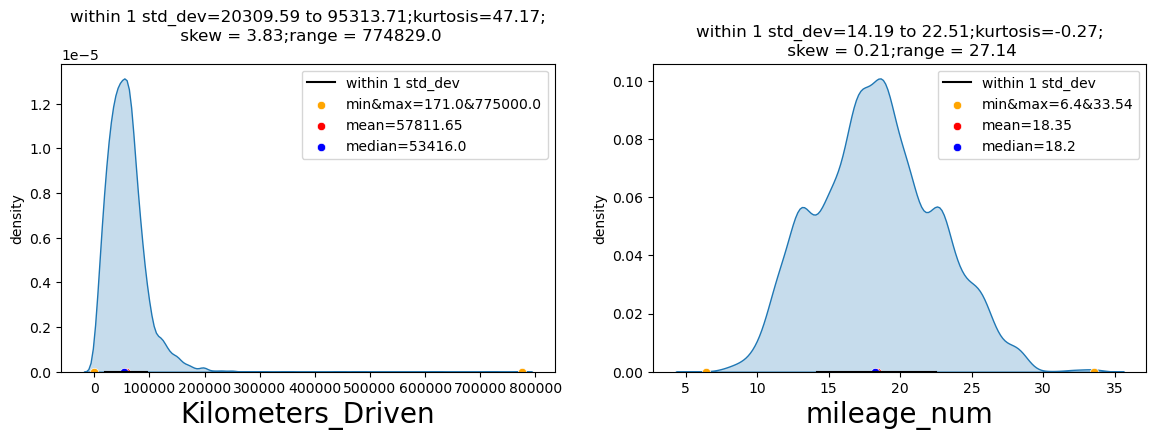

In [11]:
# Distribution of 'Kilometers_Drive' and 'mileage_num'

UVA_numeric(used_cars_df,dist_features)

### Remove Outliers to visulaise these plots

In [12]:
# standard deviation factor
factor = 3

# copying current_month group data
cm_data = used_cars_df[dist_features]

# filtering using standard deviation (not considering obseravtions > mean + factor*standard deviation)
cm_data = cm_data[cm_data['Kilometers_Driven'] < cm_data['Kilometers_Driven'].mean() + factor*cm_data['Kilometers_Driven'].std()]
cm_data = cm_data[cm_data['mileage_num'] < cm_data['mileage_num'].mean() + factor*cm_data['mileage_num'].std()]

# checking how many points removed
len(used_cars_df), len(cm_data)

(7252, 7077)

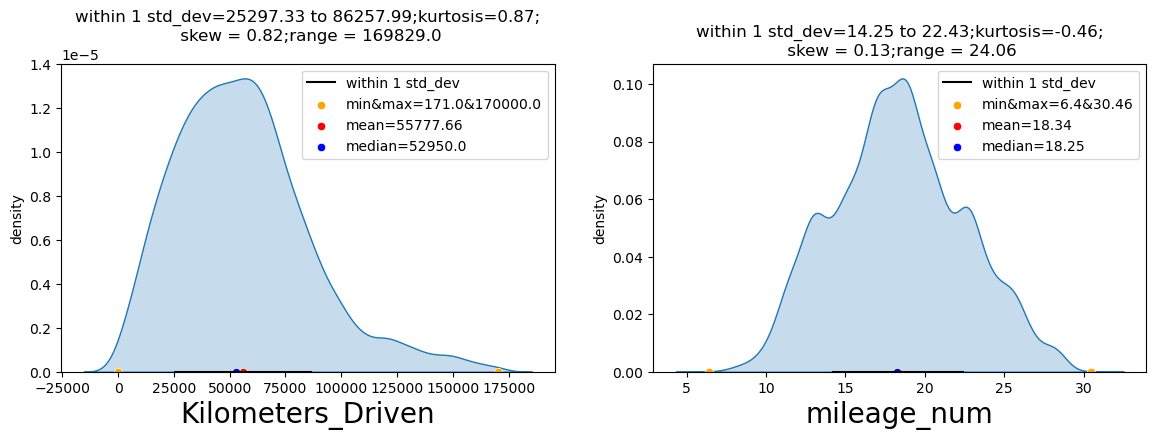

In [13]:
# Distribution of 'Kilometers_Drive' and 'mileage_num' after removing outliers

UVA_numeric(cm_data,dist_features)

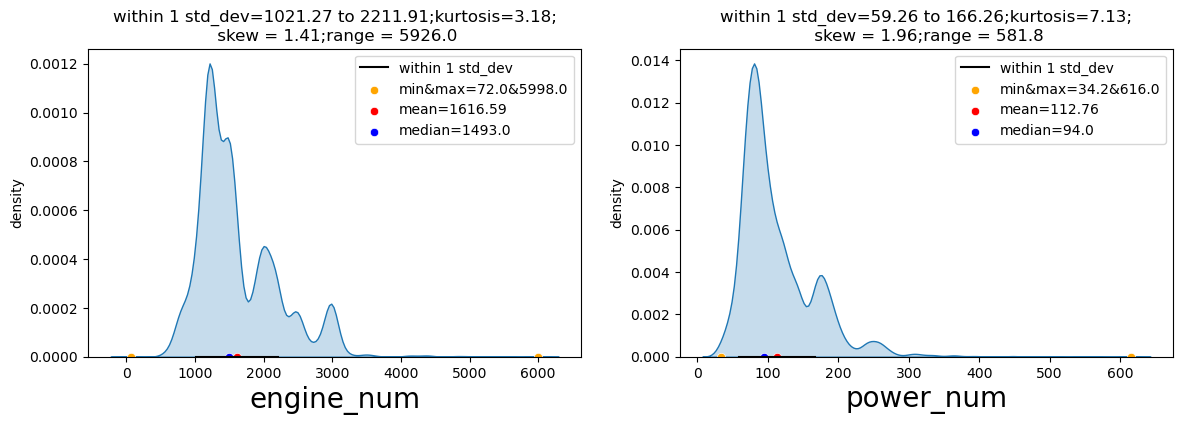

In [14]:
# Distribution of 'engine_num' and 'power_num'

UVA_numeric(used_cars_df,engine_features)

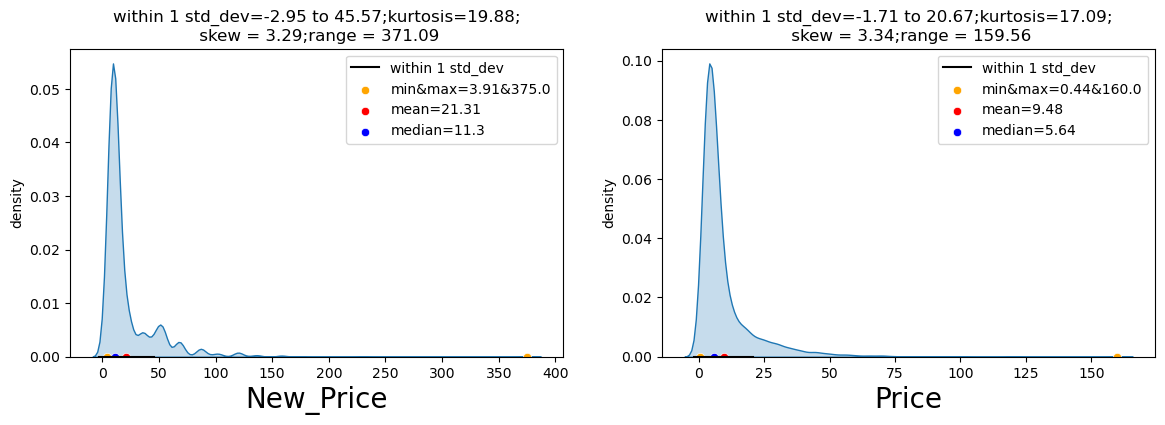

In [15]:
# Distribution of 'New_Price' and 'Price'

UVA_numeric(used_cars_df,price_features)

**Skewness**
    <br>-0.5 to -0.5 --> Symmetric
    <br>< -0.5 --> Negatively Skewed
    <br>\> 0.5 --> Positively Skewed

**Kurtosis**
    <br>k = 0 --> Mesokurtic    (Tais similar to Normal Distribution)
    <br>k > 0 --> Leptokurtic  (Longer Distribution  / fatter tail)
    <br>k < 0 --> Playtykurtic (Shorter Distribution / thinner tail)
    - 

Skewness of New_Price: 3.29
Kurtosis of New Price: 19.88


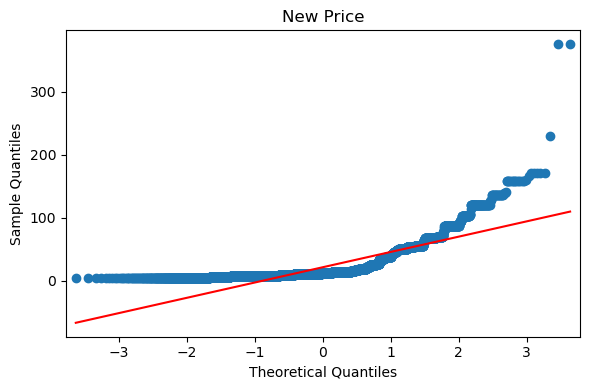

In [16]:
#qq plot for target 'New_Price'

fig, axes = plt.subplots(1, 1, figsize=(6,4))

sm.qqplot(used_cars_df['New_Price'], line='s', ax=axes)
axes.set_title('New Price')

print('Skewness of {}: {}'.format('New_Price', np.round(used_cars_df['New_Price'].skew(),2)))
print('Kurtosis of {}: {}'.format('New Price', np.round(used_cars_df['New_Price'].kurtosis(), 2)))


plt.tight_layout()

### 3.2 Univariate Analysis: Outliers<a id='3.2'></a>

In [17]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      #print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                        round(IQR,2), round(med,2), (round(quant25,2),round(quant75,2)),(outlier_low,outlier_high)))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                        round(IQR,2), round(med,2), (round(quant25,2),round(quant75,2)), (outlier_low,outlier_high)))

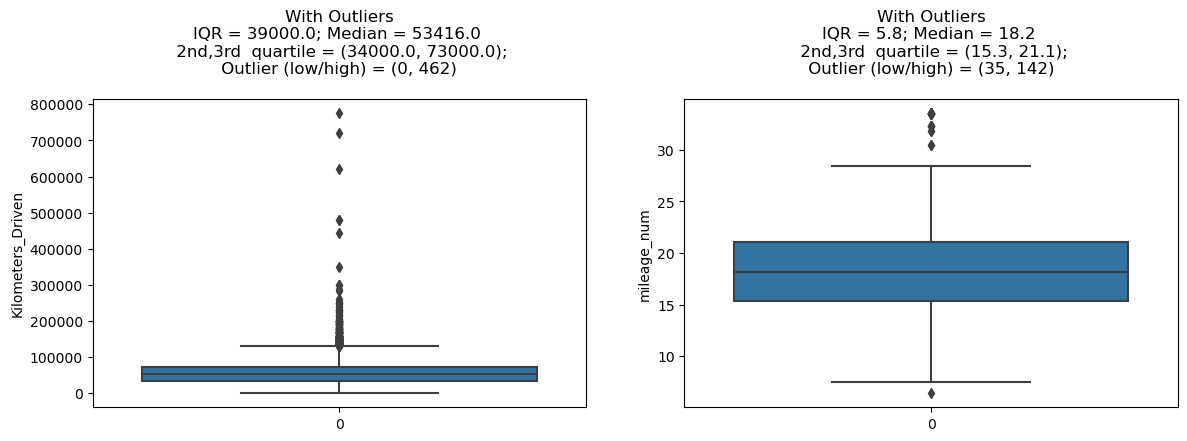

In [18]:
# Detect outlier values for 'Kilometers_Drive' and 'mileage_num' with outliers

UVA_outlier(used_cars_df, dist_features)

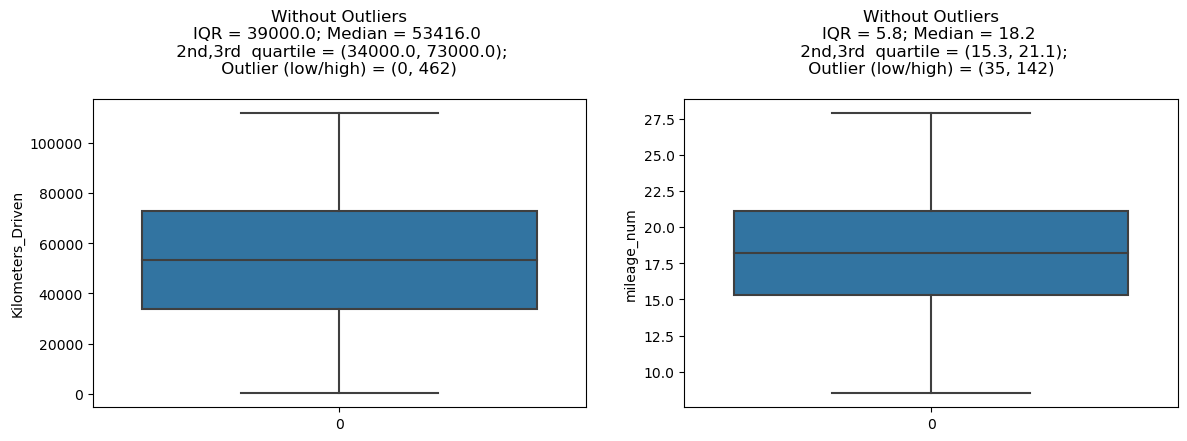

In [19]:
# Distribution of 'Kilometers_Drive' and 'mileage_num' w/o outliers

UVA_outlier(used_cars_df, dist_features, include_outlier = False)

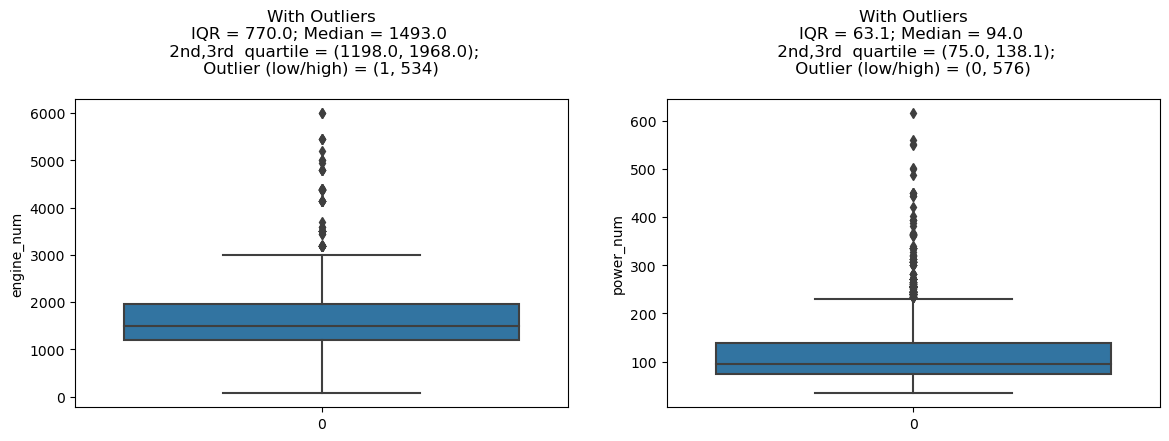

In [20]:
# Distribution of 'engine_num' and 'power_num' with outlliers

UVA_outlier(used_cars_df, engine_features)

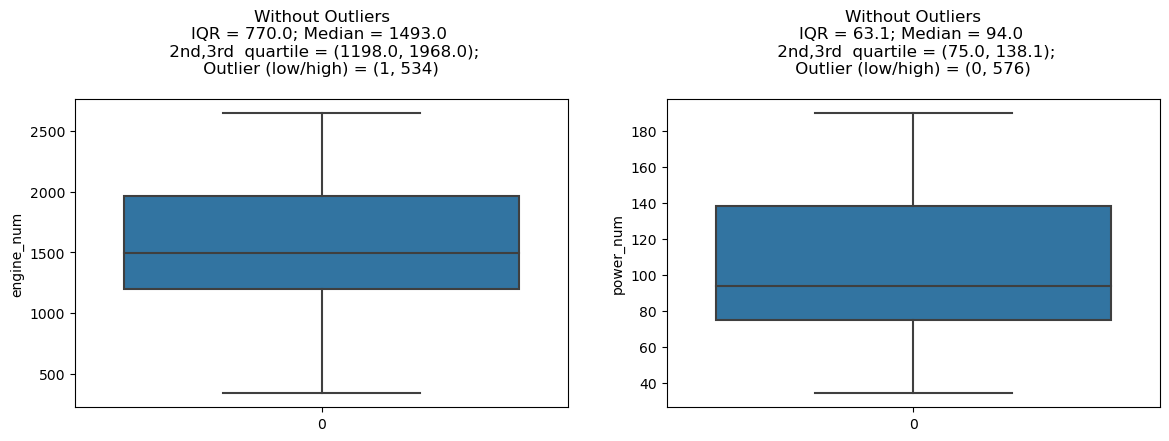

In [21]:
# Distribution of 'engine_num' and 'power_num' w/o outlliers

UVA_outlier(used_cars_df, engine_features, include_outlier = False)

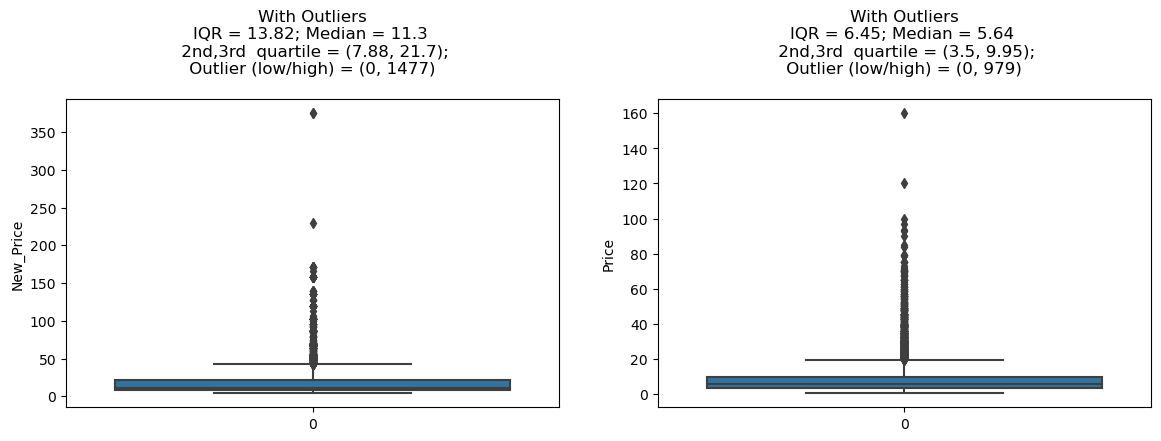

In [22]:
# Distribution of 'New_Price' and 'Price' with outlliers

UVA_outlier(used_cars_df, price_features)

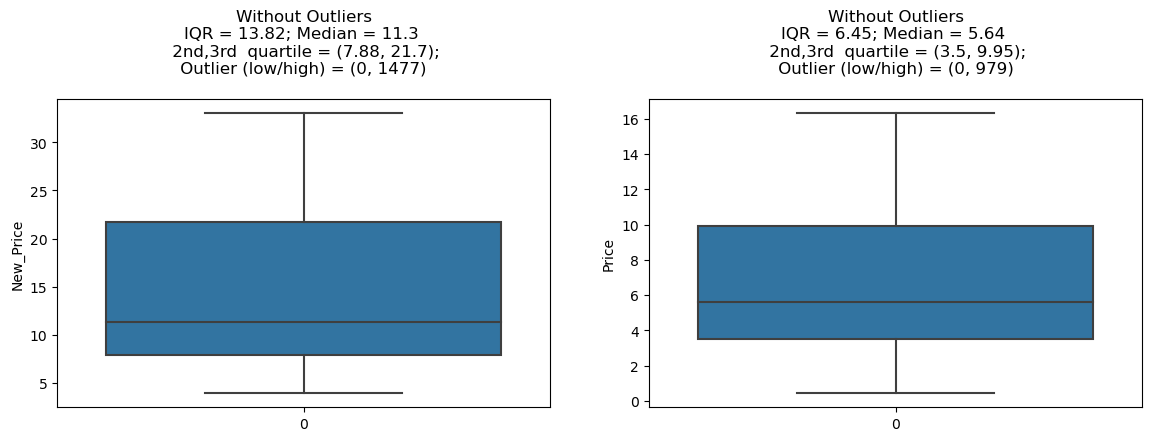

In [23]:
# Distribution of 'New_Price' and 'Price' w/o outlliers

UVA_outlier(used_cars_df, price_features, include_outlier = False)

### 3.3: Univariate Analysis: Categorical Varibales<a id='3.3'></a>

In [24]:
# custom function for easy outlier analysis

def UVA_category(data, var_group, max_categories=10):

    '''
    Univariate_Analysis_categorical
    takes a group of variables (category) and plot/print the value_counts and barplot for max_categories.
    '''
    # setting figure_size
    size = len(var_group)
    plt.figure(figsize = (7*size,5), dpi=100)

    # for every variable
    for j,i in enumerate(var_group):
        norm_count = data[i].value_counts(normalize = True)[:max_categories]
        n_uni = data[i].nunique()

        #Plotting the variable with every information
        plt.subplot(1,size,j+1)
        sns.barplot(x=norm_count, y=norm_count.index , order=norm_count.index)
        plt.xlabel('fraction/percent', fontsize = 20)
        plt.ylabel(f'{i}', fontsize = 20)
        plt.title(f'n_uniques = {n_uni} \n value Counts: \n {norm_count}')
        
        plt.tight_layout()

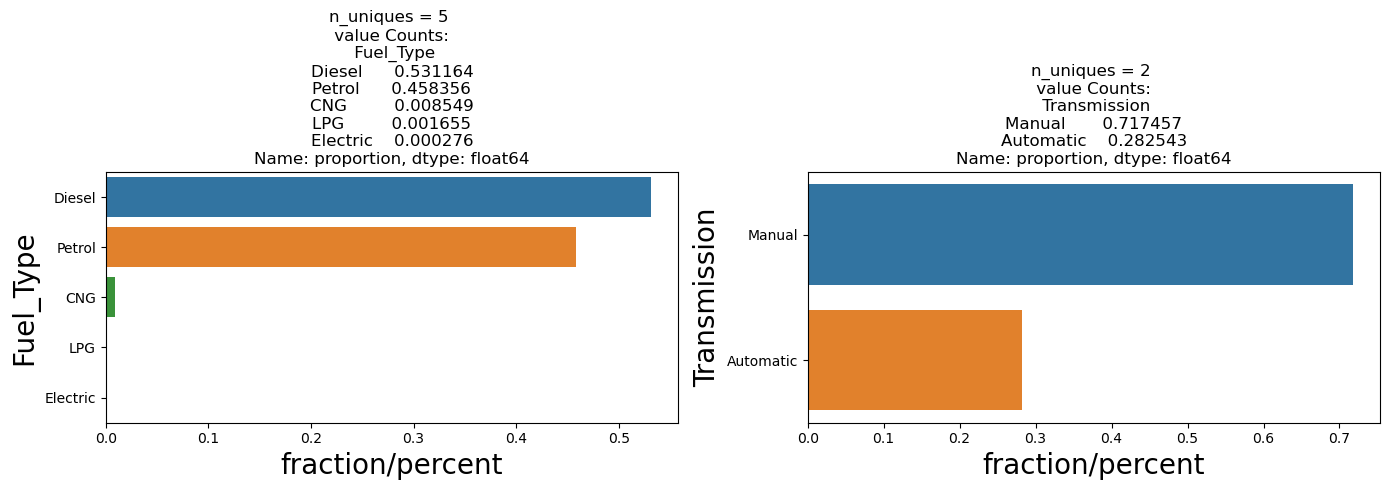

In [25]:
# Distribution of 'Fuel_type' and 'Transition'

UVA_category(used_cars_df, fuel_trans_type)

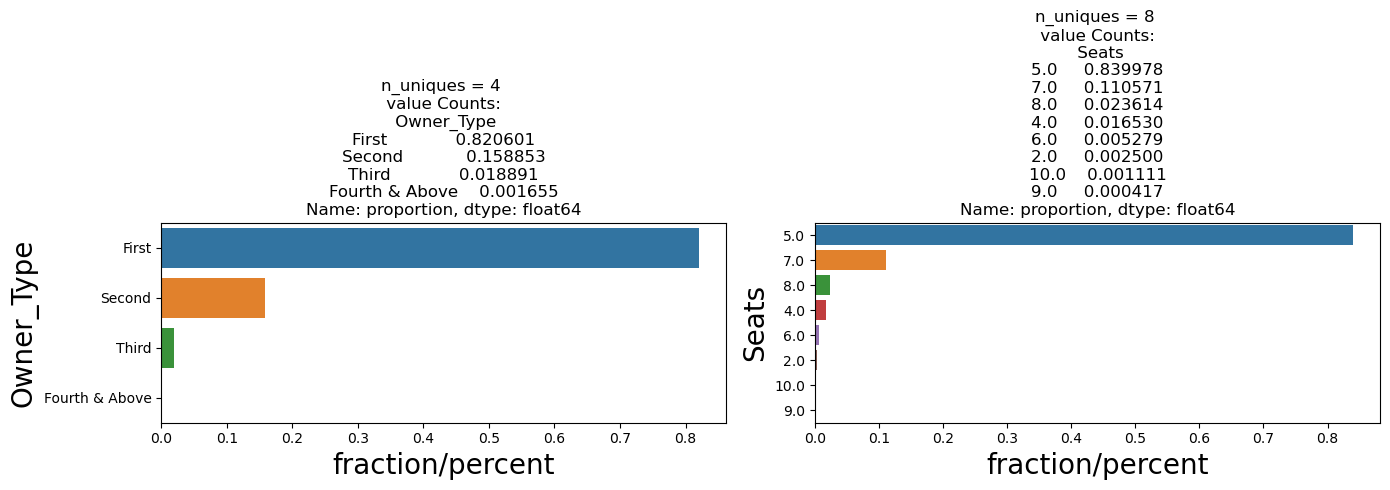

In [26]:
# Distribution of 'Owner_Type' and 'Seats'

UVA_category(used_cars_df, owner_seat_types)

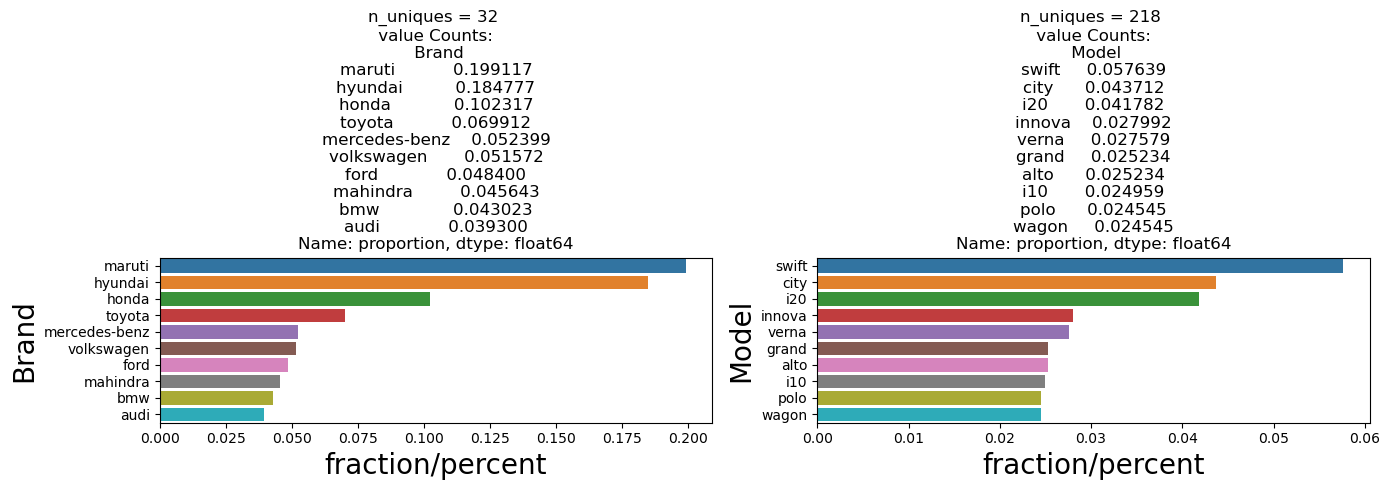

In [27]:
# Distribution of 'Brand' and 'Model'

UVA_category(used_cars_df, brand_model_types)

### 3.4 Univariate Analysis: Missing Values<a id='3.4'></a>

In [28]:
# finding number of missing values in every variable

used_cars_df.isnull().sum()

Location                0
Year                    0
Kilometers_Driven       1
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                  53
mileage_num            83
engine_num             46
power_num             175
Brand                   0
Model                   0
New_Price               0
Price                1233
dtype: int64

### 3.5 Bivariate Analysis : Numerical-Numerical<a id='3.5'></a>

In [29]:
# calculating correlation

correlation = used_cars_df[num_features].corr()
correlation

Year  Kilometers_Driven  mileage_num  engine_num  \
Year               1.000000          -0.449535     0.301015   -0.054726   
Kilometers_Driven -0.449535           1.000000    -0.143648    0.158934   
mileage_num        0.301015          -0.143648     1.000000   -0.645459   
engine_num        -0.054726           0.158934    -0.645459    1.000000   
power_num          0.013448           0.002644    -0.550767    0.859777   
New_Price         -0.006323           0.001919    -0.437343    0.697206   
Price              0.305327          -0.168299    -0.333263    0.658354   

                   power_num  New_Price     Price  
Year                0.013448  -0.006323  0.305327  
Kilometers_Driven   0.002644   0.001919 -0.168299  
mileage_num        -0.550767  -0.437343 -0.333263  
engine_num          0.859777   0.697206  0.658354  
power_num           1.000000   0.803484  0.772566  
New_Price           0.803484   1.000000  0.763362  
Price               0.772566   0.763362  1.000000

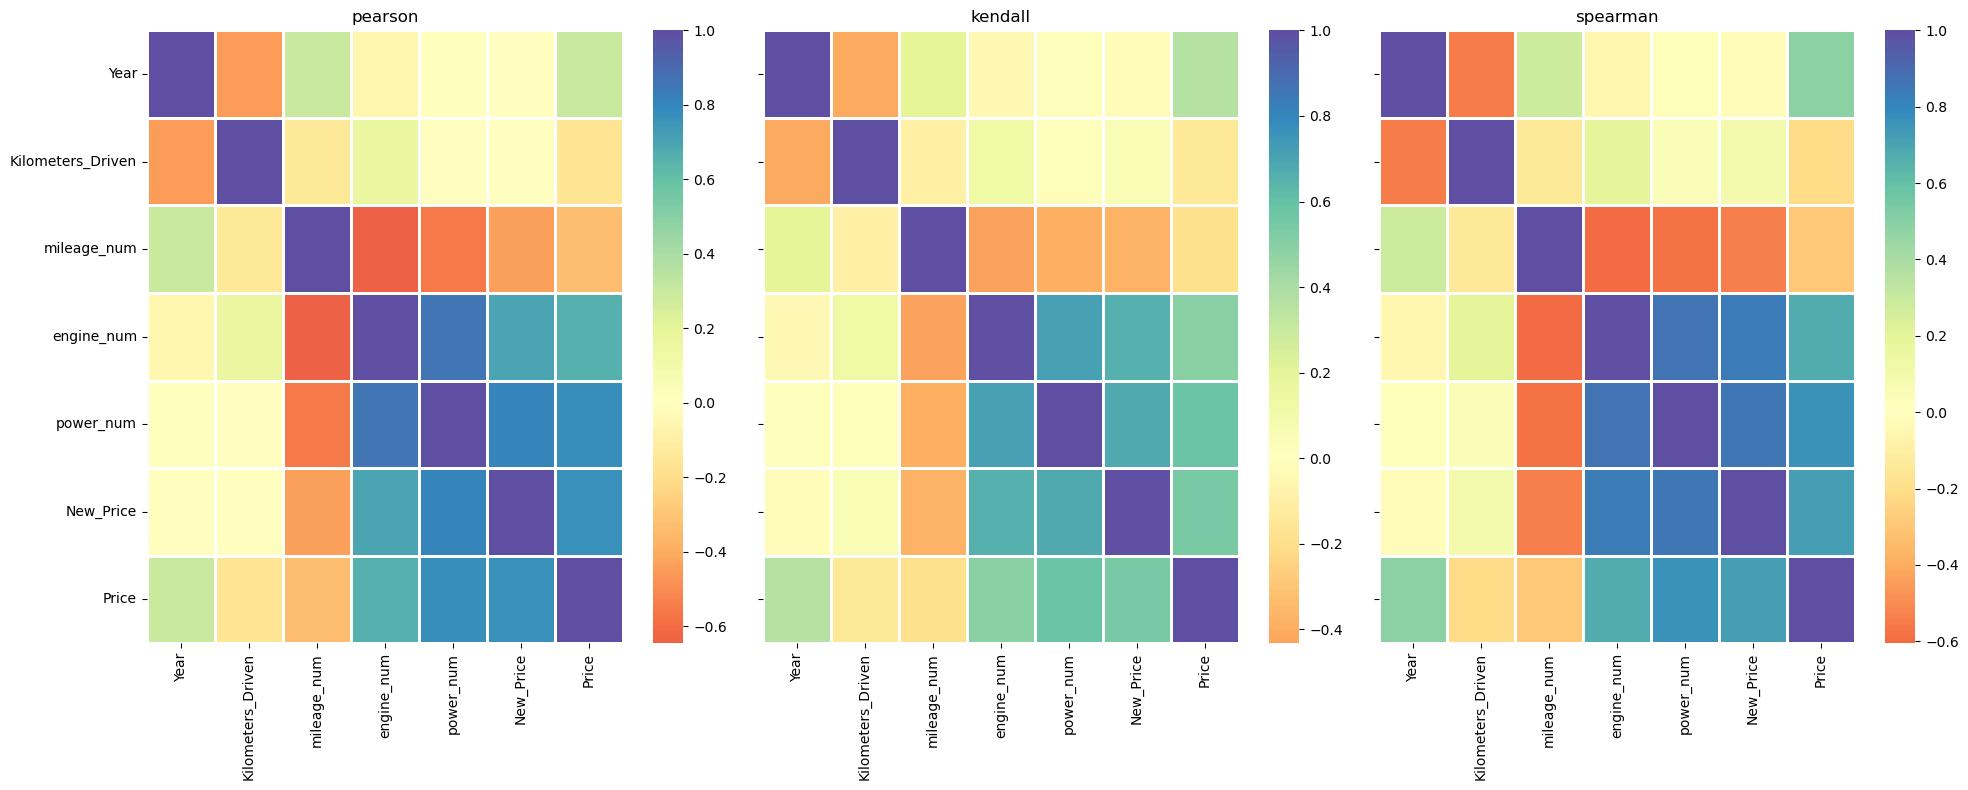

In [30]:
# plotting heatmap using all methods for all numerical variables

correlations = ['pearson','kendall','spearman']
fig, axes = plt.subplots(1, 3, figsize=(20,8), sharey='all')
for i, ax in enumerate(axes.ravel()):
    sns.heatmap(used_cars_df[num_features].corr(method=correlations[i]), linewidths=2, cmap='Spectral', center=0, ax=ax)
    axes[i].set_title(correlations[i])
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

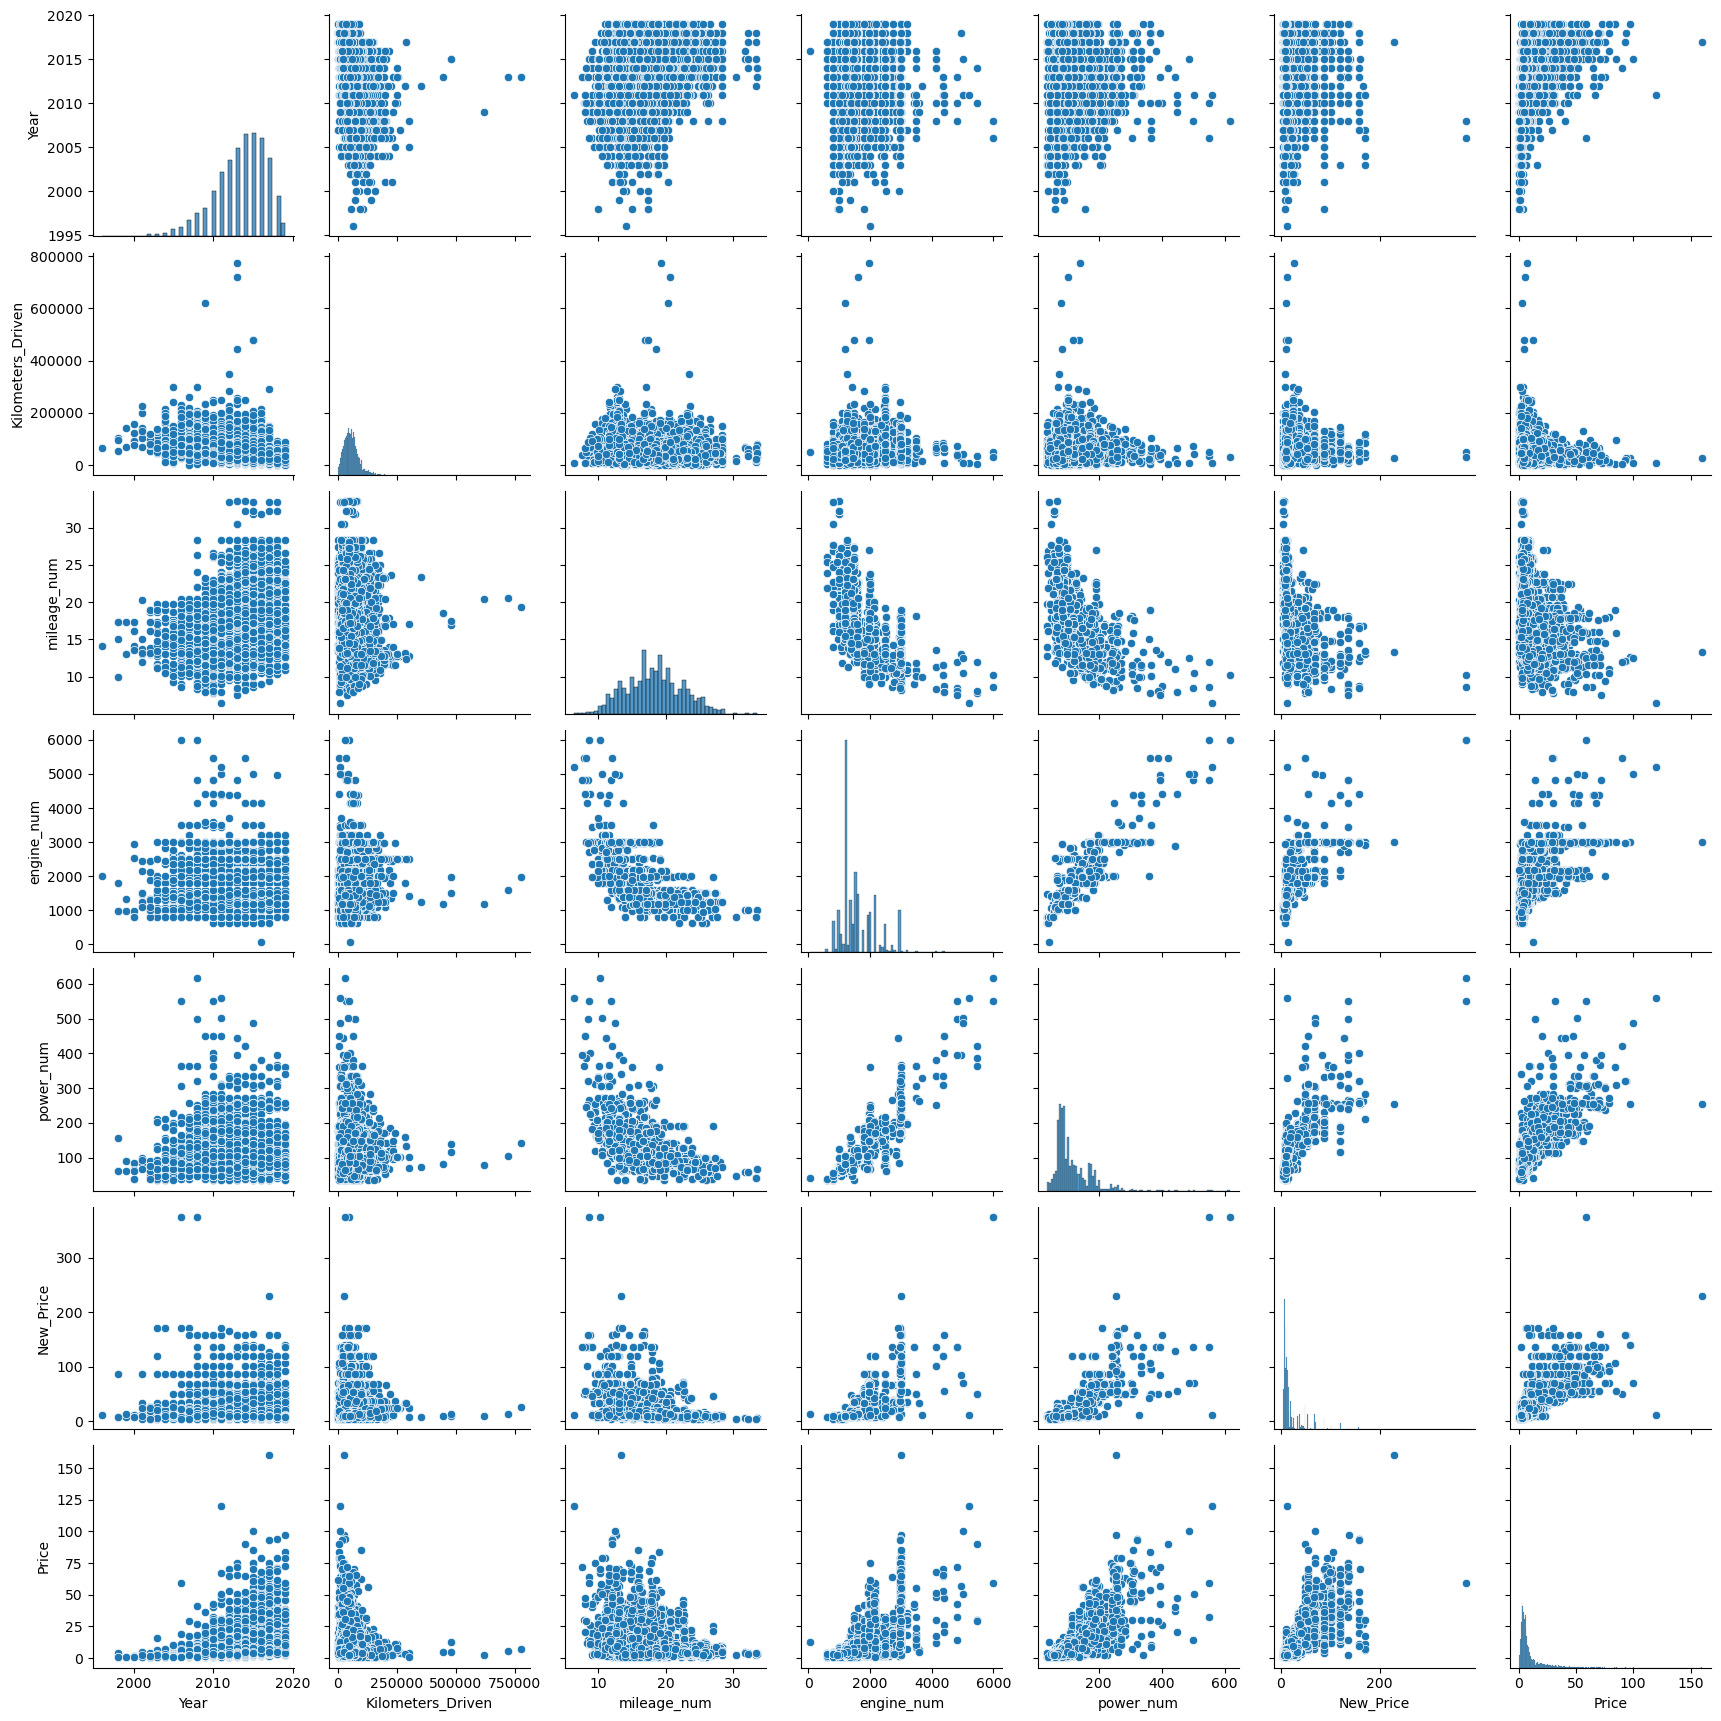

In [31]:
# scatter plot for a sample of transactional variables

plt.figure()
sns.pairplot(used_cars_df[num_features])

**the scatter plot is is not meaningful due to the presence of outliers**

In [32]:
# Add Numerical features into Var

var = []
var.extend(['Year'])
var.extend(dist_features)
var.extend(engine_features)
var.extend(price_features)

var

['Year',
 'Kilometers_Driven',
 'mileage_num',
 'engine_num',
 'power_num',
 'New_Price',
 'Price']

In [33]:
numerical = used_cars_df.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.head()

Year  Kilometers_Driven  mileage_num  engine_num  power_num  New_Price  \
0  2010            72000.0        26.60       998.0      58.16       5.51   
1  2015            41000.0        19.67      1582.0     126.20      16.06   
2  2011            46000.0        18.20      1199.0      88.70       8.61   
3  2012            87000.0        20.77      1248.0      88.76      11.27   
4  2013            40670.0        15.20      1968.0     140.80      53.14   

   Price  
0   1.75  
1  12.50  
2   4.50  
3   6.00  
4  17.74

In [34]:
#taking log of every value to negate outliers

for column in var:
  mini=1
  if numerical[column].min()<0:
    mini =  abs(numerical[column].min()) + 1
  
  numerical[column] = [i+mini for i in numerical[column]]
  numerical[column] = numerical[column].map(lambda x : np.log(x))

<Figure size 896x672 with 0 Axes>

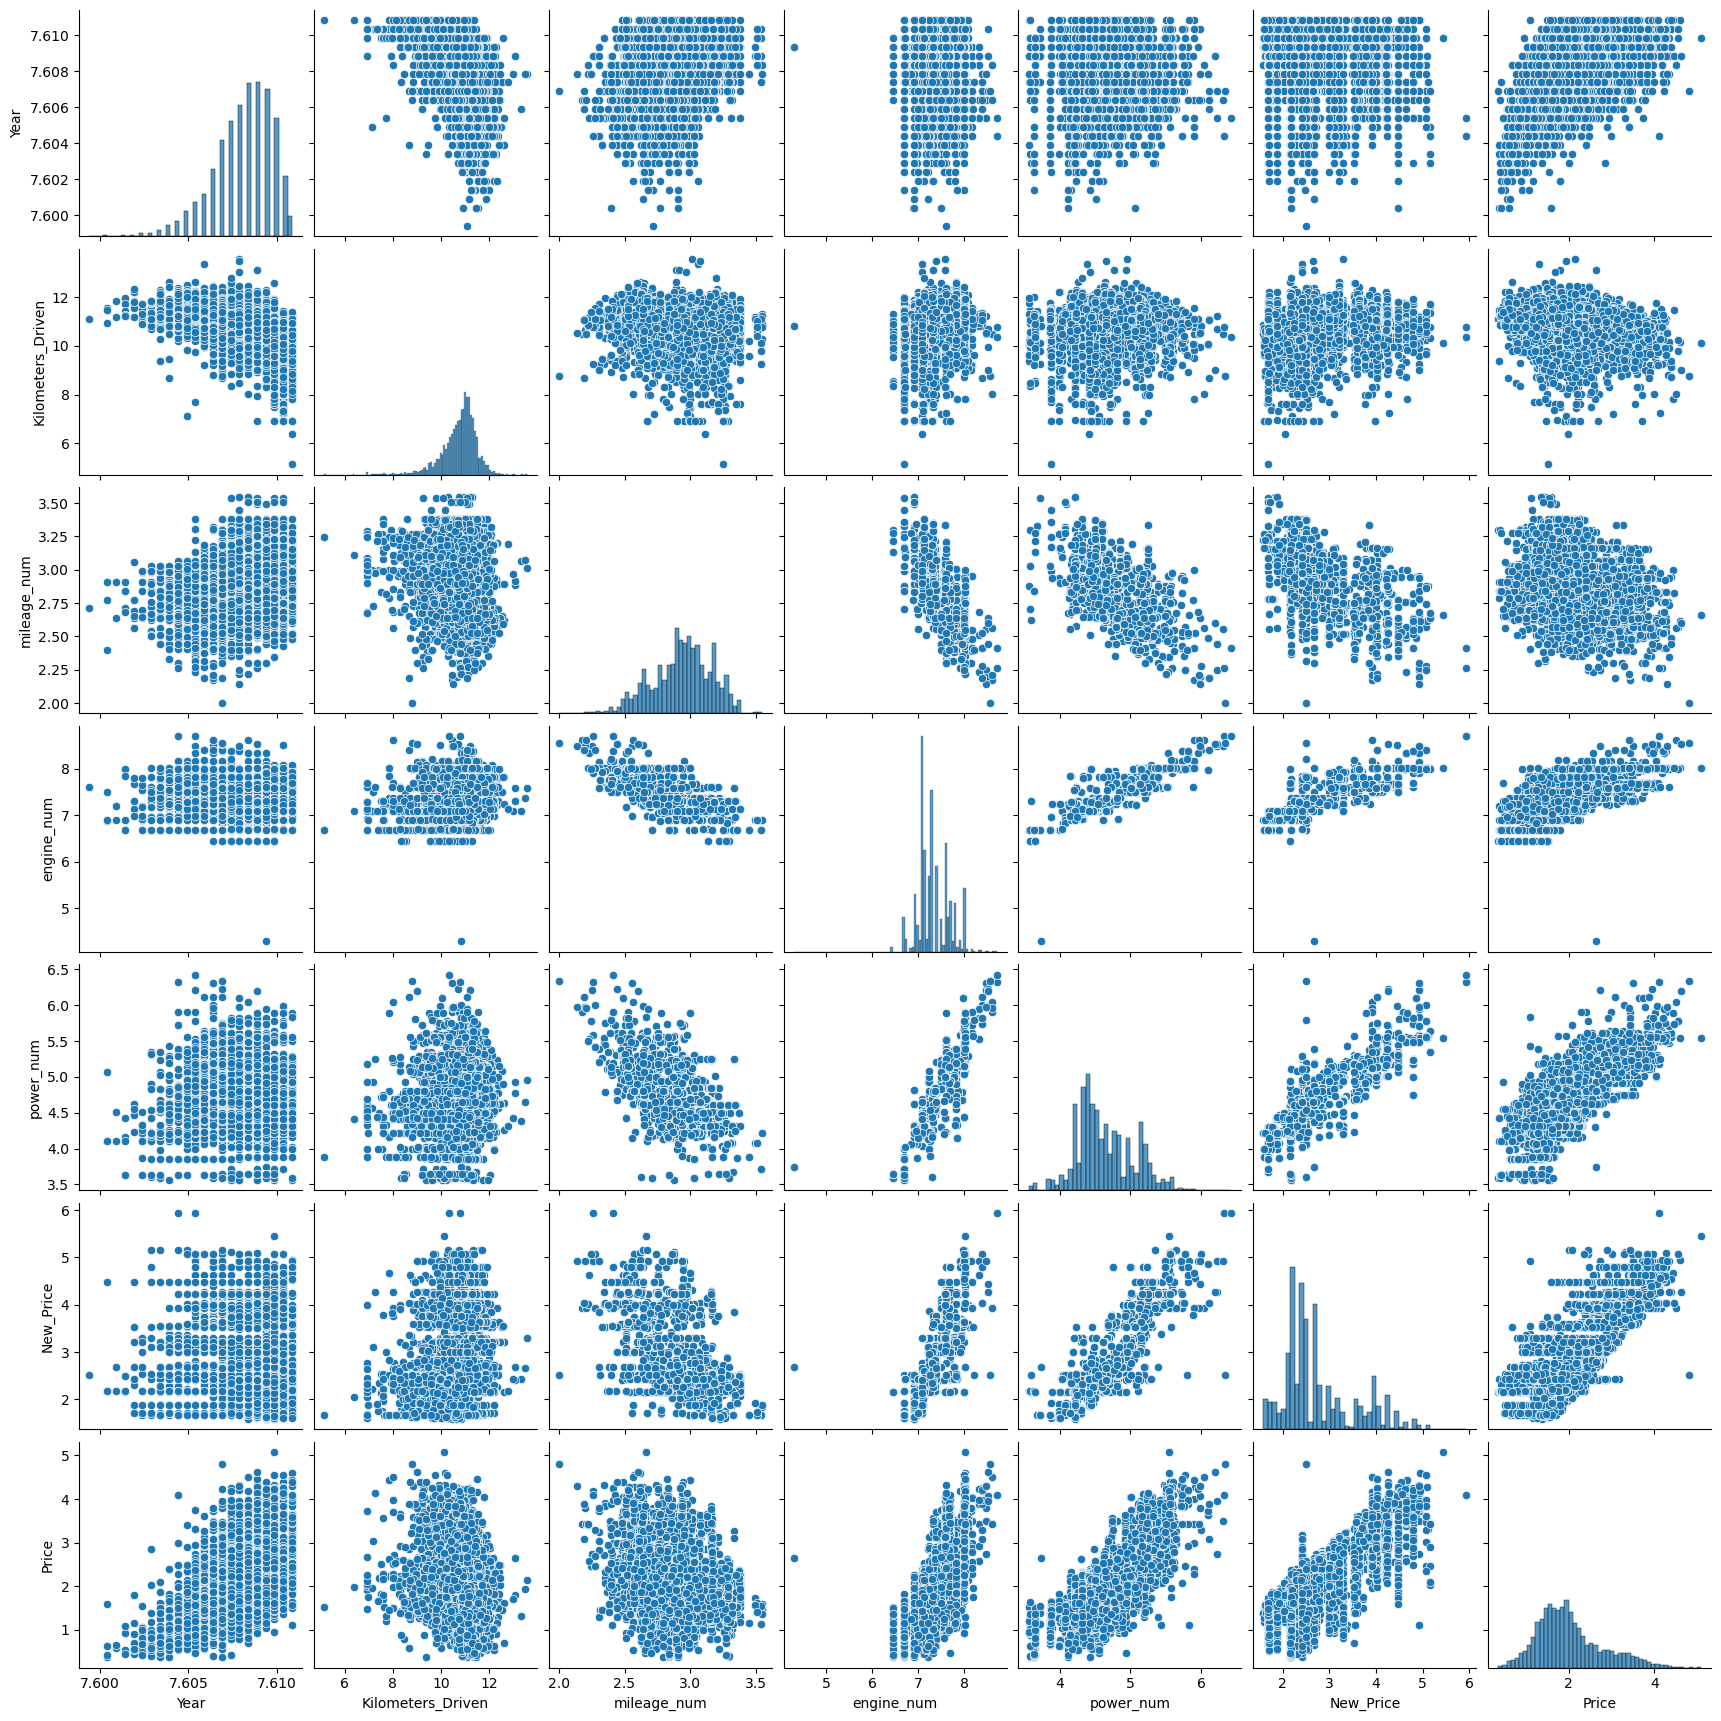

In [35]:
# scatter plot for transactional variables

plt.figure(dpi=140)
sns.pairplot(numerical[num_features])

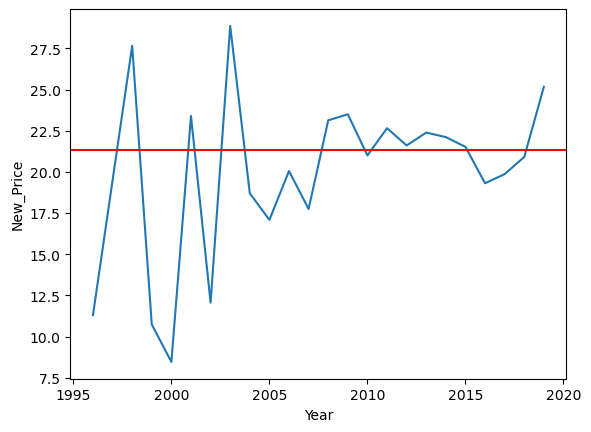

In [36]:
# Plot historical New_Price distribution 

sns.lineplot(data = used_cars_df, x = 'Year', y = 'New_Price', ci = None)
plt.axhline(y=np.nanmean(used_cars_df['New_Price']), c='r')

<Axes: xlabel='Year', ylabel='New_Price'>

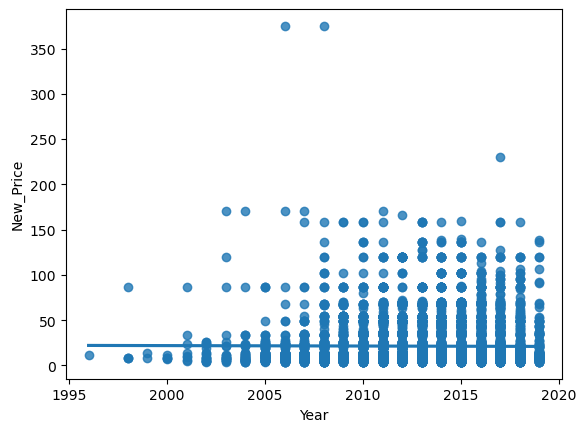

In [37]:
sns.regplot(data = used_cars_df, x = 'Year', y = 'New_Price', ci = None)

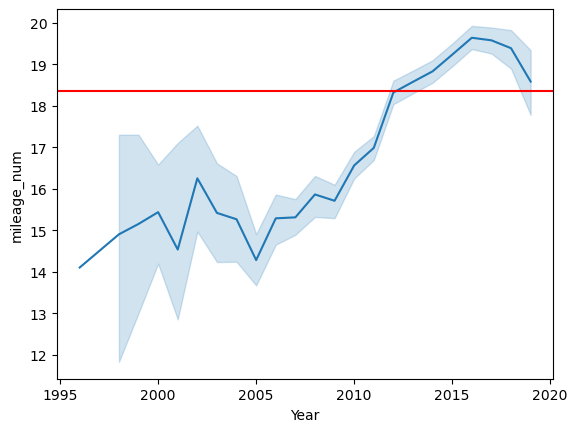

In [37]:
# Plot historical distribution of 'mileage_num'

sns.lineplot(data = used_cars_df, x = 'Year', y = 'mileage_num')
plt.axhline(y=np.nanmean(used_cars_df['mileage_num']), c='r')

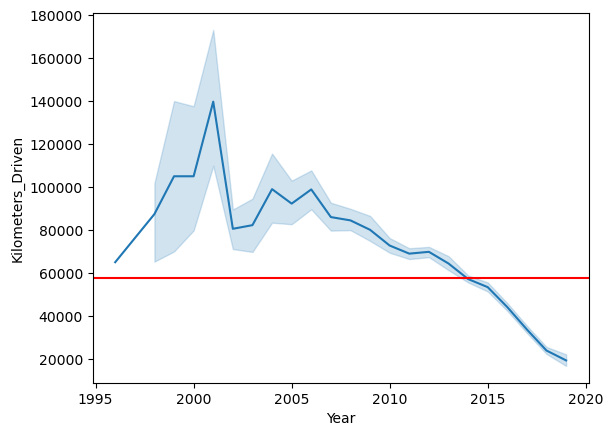

In [38]:
# Plot historical distribution of 'Kilometers_Driven'

sns.lineplot(data = used_cars_df, x = 'Year', y = 'Kilometers_Driven')
plt.axhline(y=np.nanmean(used_cars_df['Kilometers_Driven']), c='r')

<Axes: xlabel='engine_num', ylabel='New_Price'>

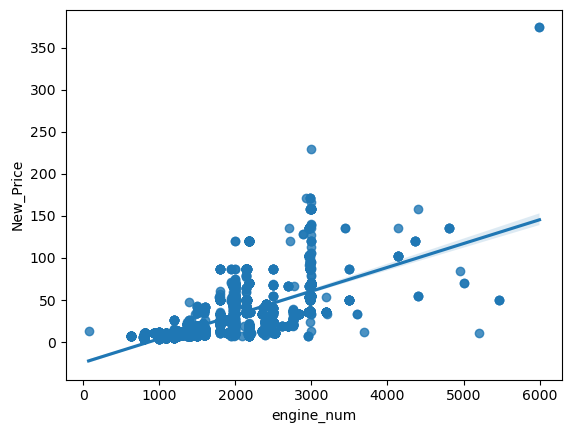

In [39]:
# Regression Plot between 'engine_num' and 'New_Price'

sns.regplot(data = used_cars_df, x = 'engine_num', y = 'New_Price', fit_reg=True)

<Axes: xlabel='mileage_num', ylabel='New_Price'>

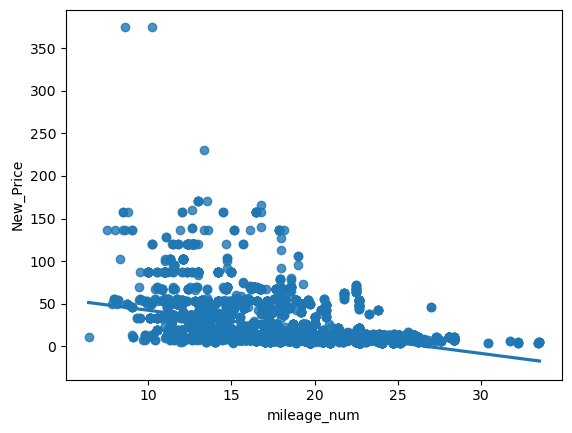

In [40]:
# Regression Plot between 'mileage_num' and 'New_Price'

sns.regplot(data = used_cars_df, x = 'mileage_num', y = 'New_Price', fit_reg=True)

In [92]:
print('Unique Locations: ',    used_cars_df['Location'].nunique())
print('Unique Seats: ',        used_cars_df['Seats'].nunique())
print('Unique Fuel_Type: ',    used_cars_df['Fuel_Type'].nunique())
print('Unique Transmission: ', used_cars_df['Transmission'].nunique())
print('Unique Owner_Type: ',   used_cars_df['Owner_Type'].nunique())
print('Unique Brand: ',        used_cars_df['Brand'].nunique())
print('Unique Model: ',        used_cars_df['Model'].nunique())

Unique Locations:  11
Unique Seats:  8
Unique Fuel_Type:  5
Unique Transmission:  2
Unique Owner_Type:  4
Unique Brand:  32
Unique Model:  218


### 3.6 Bivariate Analysis : Continuous - Categorical<a id='3.6'></a>

### 3.6.1 Perform One-Way Anova Tests<a id='3.6.1'></a>

**One-way ANOVA:** Compares the means of one continuous dependent variable based on three or more groups of one categorical variable.

ANOVA stands for ANalysis Of VAriance. It is an excellent statistical test to compare group means across different levels of one categorical variable. In case there are just two levels of a categorical variable then two sample t-test can be used, but in case number of levels in categorical variable increases from two then ANOVA is preferred approach. Alternatively, one can run two-sample t-test for all possible combinition of groups but that is a cumbersome task to execute.

Here we will explore one-way ANOVA only. One way ANOVA compares three or more levels for a categorical variable to establish if there is difference between sample means or not. Sample means will always be different but is the difference statstically significant or not? This is the main goal of ANOVA. It is called one-way ANOVA because groups are under one categorical variable. If there are two factors then it is called two-way ANOVA or ANCOVA if one variable is continious.

Assumptions for running ANOVA tests are:

<br>Normal distribution of populations
<br>Equal variances
<br>Samples are independent
<br>
<br>Here null hypothesis for one-way ANOVA is that group means are same and there is no statistical differences between group means:

H0 : mean_group1=mean_group_2=......=mean_group_n HA : Atleast one mean is different from other groups

In ANOVA variability is partitioned into two components:

Variability between groups
Variability within group
Analysis of variance analyzes or breaks apart variance of dependent variable to determine if the variation is explained by the group variability or by random variability. The test statistic for ANOVA is F

F= Model variance / Error variance

Total variability is over all variability, it is calculated as sum of squared differences between each observation and overall mean

Total Variability SS(t) = SUM (X(i,k) - X(mean)) square

Between group variablity is called model sum of squares, it is calculated as weighted sum of squared differences between mean for each group and overall mean

            SS(m)=  Sum(k)(N(k)(xk(average) - x(average))square
where n(k) is number of observations in a level and xk(average) is overall mean for K level and x(average) is overall mean of x.

Within group variation, this variability is not explained by the the mode and is calculated as
           SS(e)=  Sum(i,k)(x(ik) - x(k)mean)square
x(ik) is ith observation in k level and x(k) is mean value for K level
SS(t) = SS(m) + SS(e)

SS(m) is called explained variation by independent variable SS(e) is variation not explained by variable independent variable

Degrees of freedom:

Model degree of freedom DF(m) : Number of levels - 1
Corrected total degrees of freedome DF(t) : Sample size - 1
Error degrees of freedom DF(e) = Sample size - Number of levels
MSM = SS(m)/DF(m)

MSE = SS(e)/DF(e)

F=MSM/MSE

Null hypothesis is rejected if alpha for F is <0.05

Proportion of variability R (square) can also be calculated via MSM and MSE via

R(square) = SS(m)/SS(e)

R(square) can be between 0 and 1, if its around 0 then it means no variability is explained by independent variable. If it is near to 1 then it means that almost all the variation in target variable can be explained by the independent variable.

Now we will conduct one-way ANOVA on the `'Used Cars'` dataset. We will run ANOVA on `'Model'` variable.

In [41]:
used_cars_df['New_Price_Log'] = np.log(used_cars_df['New_Price'])
used_cars_df.head()

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0      Mumbai  2010            72000.0       CNG       Manual      First   
1        Pune  2015            41000.0    Diesel       Manual      First   
2     Chennai  2011            46000.0    Petrol       Manual      First   
3     Chennai  2012            87000.0    Diesel       Manual      First   
4  Coimbatore  2013            40670.0    Diesel    Automatic     Second   

  Seats  mileage_num  engine_num  power_num    Brand   Model  New_Price  \
0   5.0        26.60       998.0      58.16   maruti   wagon       5.51   
1   5.0        19.67      1582.0     126.20  hyundai   creta      16.06   
2   5.0        18.20      1199.0      88.70    honda    jazz       8.61   
3   7.0        20.77      1248.0      88.76   maruti  ertiga      11.27   
4   5.0        15.20      1968.0     140.80     audi      a4      53.14   

   Price  New_Price_Log  
0   1.75       1.706565  
1  12.50       2.776332  
2   4.50       2.152924  
3   6.00       2.422144  
4  17.74       3.972930

**Question:** Is there variation in `'New_Price'` off the `'Brand'` types?

<Axes: xlabel='New_Price', ylabel='Brand'>

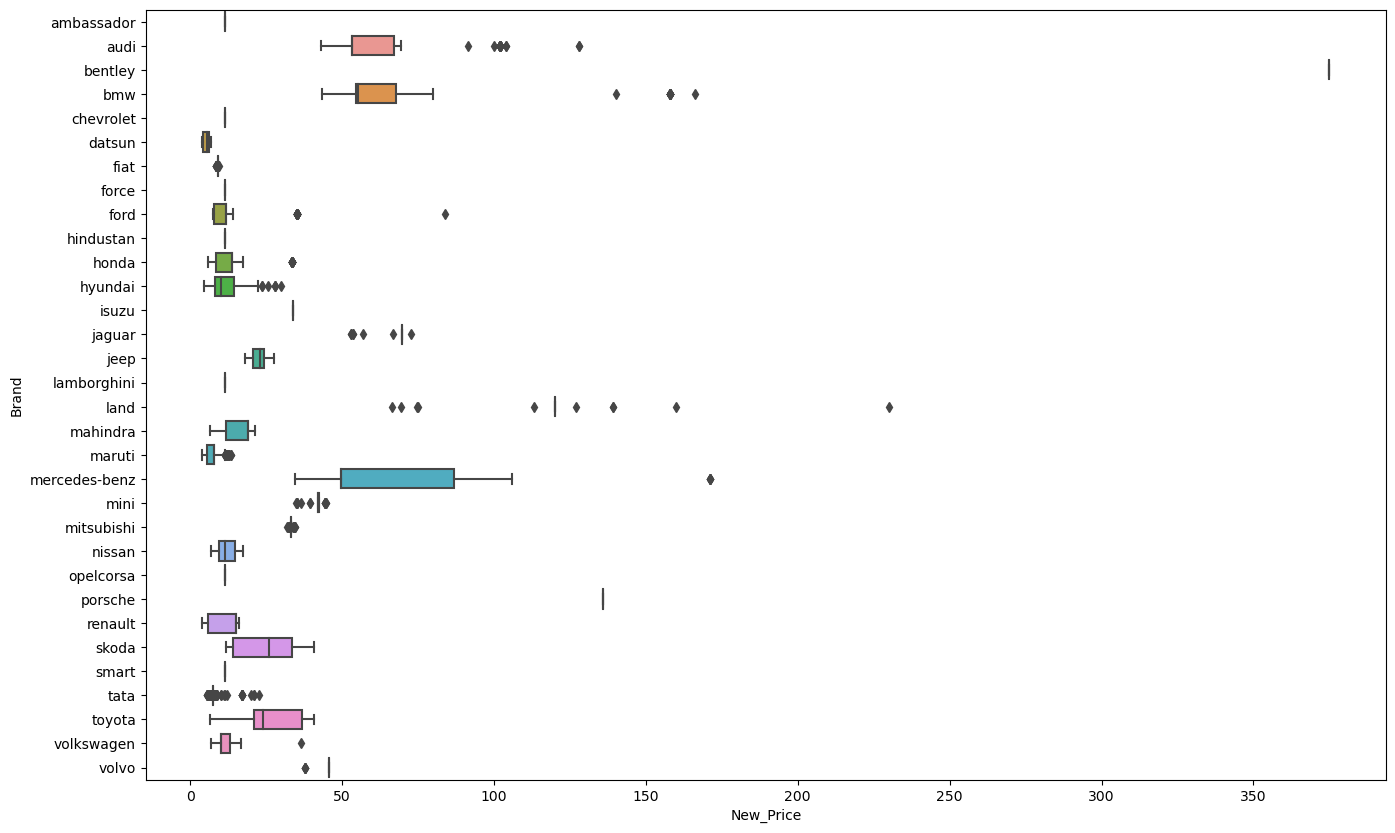

In [81]:
fig, ax = plt.subplots(1, 1, figsize = (16,10))

sns.boxplot(y = "Brand", x = "New_Price", data = used_cars_df, ax = ax)
# sns.boxplot(y = "Brand", x = "New_Price_Log", data = used_cars_df, ax = ax[1])
# sns.boxplot(x = "Seats", y = "New_Price", data = used_cars_df2, ax = ax[2])

**Answer:** There is considerable variation in `'New Price'` across the `'Brand'` groups. The significance of these differences can be tested with a one-way ANOVA

#### Model Building for Anova using 'Brand' as a Categorial Variable

Now we will test the assumptions for ANOVA

**1. Independence of observations**
This means that all groups are mutually exclusive and one record cannot fall into two categories, it also means that observations for same record or subject or Used Car in this ase is not taken at regular time intervals. Both of these conditions are satisfied here.

**2. Normality**
We will first test the assumption of normality, we will use QQ-plot to visualize if data is normally distributed or not.

QQ plot:

QQ plot is a visualization test to see if the data comes from normal distribution or not. On x-axis, theoratical quantiles are plotted, which assumes that data has mean of 0 and standard deviation of 1 and on y-axis there is actual plot of data. If actual data follows a normal distribution then plot will show dots (original data) tightly coupled around the straight line (theoratical data)

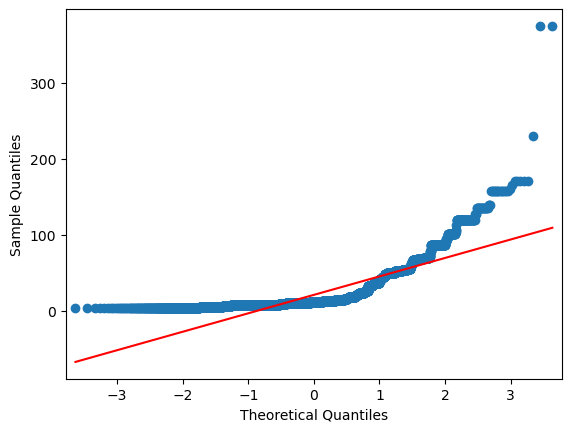

Skewness of New_Price: 3.29
Kurtosis of New Price: 19.88


In [102]:
qqplot(used_cars_df['New_Price'],line='s')
plt.show()

print('Skewness of {}: {}'.format('New_Price', np.round(used_cars_df['New_Price'].skew(),2)))
print('Kurtosis of {}: {}'.format('New Price', np.round(used_cars_df['New_Price'].kurtosis(), 2)))

**Skewness**
    <br>-0.5 to -0.5 --> Symmetric
    <br>< -0.5 --> Negatively Skewed
    <br>\> 0.5 --> Positively Skewed

**Kurtosis**
    <br>k = 0 --> Mesokurtic    (Tais similar to Normal Distribution)
    <br>k > 0 --> Leptokurtic  (Longer Distribution  / fatter tail)
    <br>k < 0 --> Playtykurtic (Shorter Distribution / thinner tail)

 qq-plot like this means that data is skewed towards right. So we will apply log transformation on New Price column and then plot qq-plot again.

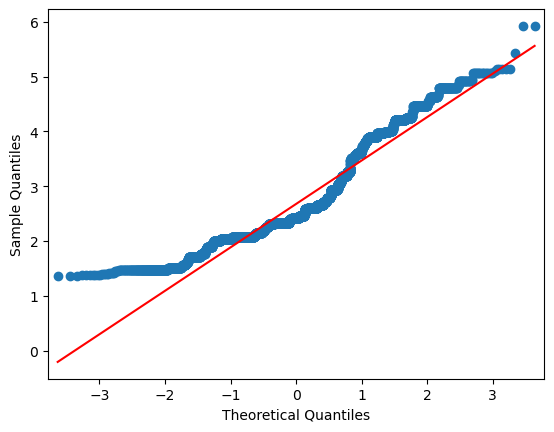

Skewness of New_Price_Log: 0.92
Kurtosis of New Price_Log: 0.11


In [104]:
qqplot(used_cars_df['New_Price_Log'],line='s')

plt.show()

print('Skewness of {}: {}'.format('New_Price_Log', np.round(used_cars_df['New_Price_Log'].skew(),2)))
print('Kurtosis of {}: {}'.format('New Price_Log', np.round(used_cars_df['New_Price_Log'].kurtosis(), 2)))

**Skewness**
    <br>-0.5 to -0.5 --> Symmetric
    <br>< -0.5 --> Negatively Skewed
    <br>\> 0.5 --> Positively Skewed

**Kurtosis**
    <br>k = 0 --> Mesokurtic    (Tais similar to Normal Distribution)
    <br>k > 0 --> Leptokurtic  (Longer Distribution  / fatter tail)
    <br>k < 0 --> Playtykurtic (Shorter Distribution / thinner tail)

As we can see that data points are tightly coupled around the straight line, now we can say that data is normally distributed

**3. Equal variance**
Third assumption is that all the groups have equal variances. This can be tested using levene's test of homogeneity of variance. We will analyze Brand categorical variable here.

In [84]:
used_cars_df['Brand'].unique()

['maruti', 'hyundai', 'honda', 'audi', 'nissan', ..., 'force', 'bentley', 'lamborghini', 'hindustan', 'opelcorsa']
Length: 32
Categories (32, object): ['ambassador', 'audi', 'bentley', 'bmw', ..., 'tata', 'toyota', 'volkswagen', 'volvo']

Now we will conduct Levene's test of homegeneity. 

**Null hypothesis**: The variance for all groups is same.

In [87]:
Stat,p = f_oneway( used_cars_df['New_Price_Log'][used_cars_df['Brand'] == 'maruti'],
used_cars_df['New_Price_Log'][used_cars_df['Brand'] == 'hyundai'],
used_cars_df['New_Price_Log'][used_cars_df['Brand'] == 'honda'],
used_cars_df['New_Price_Log'][used_cars_df['Brand'] == 'audi'],
used_cars_df['New_Price_Log'][used_cars_df['Brand'] == 'nissan'],
used_cars_df['New_Price_Log'][used_cars_df['Brand'] == 'toyota'],
used_cars_df['New_Price_Log'][used_cars_df['Brand'] == 'volkswagen'],
used_cars_df['New_Price_Log'][used_cars_df['Brand'] == 'tata'],
used_cars_df['New_Price_Log'][used_cars_df['Brand'] == 'land'],
used_cars_df['New_Price_Log'][used_cars_df['Brand'] == 'mitsubishi'],
used_cars_df['New_Price_Log'][used_cars_df['Brand'] == 'renault'],
used_cars_df['New_Price_Log'][used_cars_df['Brand'] == 'mercedes-benz'],
used_cars_df['New_Price_Log'][used_cars_df['Brand'] == 'bmw'],
used_cars_df['New_Price_Log'][used_cars_df['Brand'] == 'mahindra'],
used_cars_df['New_Price_Log'][used_cars_df['Brand'] == 'ford'],
used_cars_df['New_Price_Log'][used_cars_df['Brand'] == 'porsche'],
used_cars_df['New_Price_Log'][used_cars_df['Brand'] == 'datsun'],
used_cars_df['New_Price_Log'][used_cars_df['Brand'] == 'jaguar'],
used_cars_df['New_Price_Log'][used_cars_df['Brand'] == 'volvo'],
used_cars_df['New_Price_Log'][used_cars_df['Brand'] == 'chevrolet'],
used_cars_df['New_Price_Log'][used_cars_df['Brand'] == 'skoda'],
used_cars_df['New_Price_Log'][used_cars_df['Brand'] == 'mini'],
used_cars_df['New_Price_Log'][used_cars_df['Brand'] == 'fiat'],
used_cars_df['New_Price_Log'][used_cars_df['Brand'] == 'jeep'],
used_cars_df['New_Price_Log'][used_cars_df['Brand'] == 'smart'],
used_cars_df['New_Price_Log'][used_cars_df['Brand'] == 'ambassador'],
used_cars_df['New_Price_Log'][used_cars_df['Brand'] == 'isuzu'],
used_cars_df['New_Price_Log'][used_cars_df['Brand'] == 'force'],
used_cars_df['New_Price_Log'][used_cars_df['Brand'] == 'bentley'],
used_cars_df['New_Price_Log'][used_cars_df['Brand'] == 'lamborghini'],
used_cars_df['New_Price_Log'][used_cars_df['Brand'] == 'hindustan'],
used_cars_df['New_Price_Log'][used_cars_df['Brand'] == 'opelcorsa'])


In [89]:
print('P-value for one way anova test:',p)

P-value for one way anova test: 0.0


As p-value for one-way ANOVA is less than 0.05 so we can conclude that atleast one group mean is different from others.

Note: One-way ANOVA only tell us that atleast one group mean is different, it doesn't tell which one is different. In order to identify that we will run another test that will do pair wise comparison between all groups.

**Now we will run pair wise Tukey test to see which pair is different**

In [91]:
tukey = pairwise_tukeyhsd(endog=used_cars_df['New_Price_Log'], groups=used_cars_df['Brand'], alpha=0.05)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
   ambassador          audi   1.6707 0.0001  0.4424  2.8991   True
   ambassador       bentley   3.5021    0.0  2.0003  5.0039   True
   ambassador           bmw   1.6896 0.0001  0.4614  2.9178   True
   ambassador     chevrolet      0.0    1.0 -1.2303  1.2303  False
   ambassador        datsun  -0.7829 0.8931 -2.0447  0.4788  False
   ambassador          fiat  -0.2261    1.0 -1.4683  1.0162  False
   ambassador         force      0.0    1.0 -1.4159  1.4159  False
   ambassador          ford   0.0325    1.0 -1.1954  1.2605  False
   ambassador     hindustan      0.0    1.0 -1.7341  1.7341  False
   ambassador         honda   0.0325    1.0 -1.1945  1.2596  False
   ambassador       hyundai  -0.1004    1.0 -1.3271  1.1263  False
   ambassador         isuzu   1.0921 0.3562 -0.2511  2.4354  F

The test results show that the difference in mean of 'New Price' is statistically different for those levels of Brand categorical variable where p values is < 0.05.



In order to run ANOVA, we need to create a Regression Model. 

To do this, we'll import the statsmodels.api package and the ols() function. Next, we'll create a simple linear regression model where the X variable is color, which we will code as categorical using C(). Then, we'll fit the model to the data, and generate model summary statistics.

In [105]:
# Construct simple linear regression model, and fit the model

anova_model = ols(formula = "New_Price_Log ~ C(Brand)", data = used_cars_df).fit()

In [106]:
# Get summary statistics

anova_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          New_Price_Log   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     1167.
Date:                Wed, 31 Jul 2024   Prob (F-statistic):               0.00
Time:                        09:51:27   Log-Likelihood:                -2106.4
No. Observations:                7252   AIC:                             4277.
Df Residuals:                    7220   BIC:                             4497.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     2.4248      0.324      7.478      0.000       1.789       3.060
C(Brand)[T.audi]              1.6707      0.325      5.144      0.000       1.034       2.307
C(Brand)[T.bentley]           3.5021      0.397      8.819      0.000       2.724       4.281
C(Brand)[T.bmw]               1.6896      0.325      5.203      0.000       1.053       2.326
C(Brand)[T.chevrolet]      2.842e-14      0.325   8.74e-14      1.000      -0.638       0.638
C(Brand)[T.datsun]           -0.7829      0.334     -2.347      0.019      -1.437      -0.129
C(Brand)[T.fiat]             -0.2261      0.328     -0.688      0.491      -0.870       0.418
C(Brand)[T.force]          3.664e-14      0.374   9.79e-14      1.000      -0.734       0.734
C(Brand)[T.ford]              0.0325      0.325      0.100      0.920      -0.604       0.669
C(Brand)[T.hindustan]      7.973e-16      0.459   1.74e-15      1.000      -0.899       0.899
C(Brand)[T.honda]             0.0325      0.324      0.100      0.920      -0.604       0.669
C(Brand)[T.hyundai]          -0.1004      0.324     -0.310      0.757      -0.736       0.535
C(Brand)[T.isuzu]             1.0921      0.355      3.075      0.002       0.396       1.788
C(Brand)[T.jaguar]            1.7924      0.328      5.471      0.000       1.150       2.435
C(Brand)[T.jeep]              0.6923      0.333      2.081      0.037       0.040       1.344
C(Brand)[T.lamborghini]    4.215e-14      0.459   9.19e-14      1.000      -0.899       0.899
C(Brand)[T.land]              2.3499      0.327      7.194      0.000       1.710       2.990
C(Brand)[T.mahindra]          0.3460      0.325      1.066      0.287      -0.291       0.983
C(Brand)[T.maruti]           -0.4374      0.324     -1.349      0.177      -1.073       0.198
C(Brand)[T.mercedes-benz]     1.6534      0.325      5.093      0.000       1.017       2.290
C(Brand)[T.mini]              1.2950      0.329      3.931      0.000       0.649       1.941
C(Brand)[T.mitsubishi]        1.0790      0.329      3.283      0.001       0.435       1.723
C(Brand)[T.nissan]            0.0190      0.326      0.058      0.954      -0.619       0.657
C(Brand)[T.opelcorsa]      1.066e-14      0.459   2.32e-14      1.000      -0.899       0.899
C(Brand)[T.porsche]           2.4879      0.333      7.479      0.000       1.836       3.140
C(Brand)[T.renault]          -0.0153      0.325     -0.047      0.962      -0.653       0.622
C(Brand)[T.skoda]             0.7313      0.325      2.250      0.024       0.094       1.369
C(Brand)[T.smart]          1.776e-15      0.459   3.87e-15      1.000      -0.899       0.899
C(Brand)[T.tata]             -0.3515      0.325     -1.082      0.279      -0.989       0.285
C(Brand)[T.toyota]            0.6812      0.325      2.099      0.036      

Based on the model summary table, the Brand categories associated beta coefficients many have p-value of less than 0.05 (check the P>|t| column). But we can't be sure if there is a significant New Price difference between the various Brand grades. This is where One-Way ANOVA comes in.

First, we have to state our Null and Alternative hypotheses:

**Null Hypothesis
H0
:** There is No New Price difference based on Brand.

**Alternative Hypothesis
H1:** There is a difference in New Price based on Brand.

In [108]:
sm.stats.anova_lm(anova_model, typ = 1)

df       sum_sq     mean_sq            F  PR(>F)
C(Brand)    31.0  3803.991814  122.709413  1167.179673     0.0
Residual  7220.0   759.062195    0.105133          NaN     NaN

### 3.6.2 Perform Two-Way Anova Tests<a id='3.6.2'></a>

**Two-way ANOVA:** Compares the means of one continuous dependent variable based on three or more groups of two categorical variables.

In one way ANOVA, a continious response variable is examined against different levels of one categorical variable. However if a response variable is being studied against two or multiple categorical variables then its called **n-way ANOVA.** But for the sake of simplicity we will explore **Two-Way ANOVA** in this notebook. In two way ANOVA there are two categorical variables having multiple levels.

Here are some important terms explained.

**Main effect:** The effect of a single variable on the response. For example if we are using gender and post code variable for one city to analyze sale price of a particular product then any change in sale studied against gender or post code alone is called main effect.

**Interaction effect:** Considering the example of analyzing sale price of product in a city based on gender and post code, so change in both sale price of product based on gender and post code combinition is called interaction effect. In many cases when two variables are studied together then effects are not additive.

Create a multiple linear regression model using the ols() function, fit the model to the data, and get the summary statistics.

**Note: This regression model includes two categorical X variables: 'Model' and 'Brand' and a variable to account for the interaction between these two. The interaction is denoted using the : symbol.**

In [93]:
# Construct a multiple linear regression with an interaction term between color and cut

model2 = ols(formula = "New_Price_Log ~ C(Brand) + C(Model) + C(Brand):C(Model)", data = used_cars_df).fit()

In [94]:
# Get summary statistics

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          New_Price_Log   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.244e+04
Date:                Tue, 30 Jul 2024   Prob (F-statistic):               0.00
Time:                        19:07:40   Log-Likelihood:                 13041.
No. Observations:                7252   AIC:                        -2.564e+04
Df Residuals:                    7030   BIC:                        -2.411e+04
Df Model:                         221                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             2.9159      0.004    776.528      0.000       2.909       2.923
C(Brand)[T.audi]                                      0.9954      0.005    185.686      0.000       0.985       1.006
C(Brand)[T.bentley]                                   1.5055      0.014    106.010      0.000       1.478       1.533
C(Brand)[T.bmw]                                       1.0927      0.023     47.964      0.000       1.048       1.137
C(Brand)[T.chevrolet]                                -0.4018      0.005    -82.801      0.000      -0.411      -0.392
C(Brand)[T.datsun]                                   -0.7589      0.009    -82.856      0.000      -0.777      -0.741
C(Brand)[T.fiat]                                     -0.5562      0.009    -63.929      0.000      -0.573      -0.539
C(Brand)[T.force]                                    -0.1637      0.008    -20.932      0.000      -0.179      -0.148
C(Brand)[T.ford]                                     -0.1534      0.011    -14.079      0.000      -0.175      -0.132
C(Brand)[T.hindustan]                                -0.1637      0.013    -12.189      0.000      -0.190      -0.137
C(Brand)[T.honda]                                    -0.3408      0.005    -70.157      0.000      -0.350      -0.331
C(Brand)[T.hyundai]                                  -0.4622      0.004   -119.989      0.000      -0.470      -0.455
C(Brand)[T.isuzu]                                     0.3606      0.012     29.277      0.000       0.336       0.385
C(Brand)[T.jaguar]                                    0.8427      0.008    103.131      0.000       0.827       0.859
C(Brand)[T.jeep]                                      0.0671      0.003     20.252      0.000       0.061       0.074
C(Brand)[T.lamborghini]                              -0.1637      0.013    -12.189      0.000      -0.190      -0.137
C(Brand)[T.land]                                      0.6196      0.002    301.094      0.000       0.616       0.624
C(Brand)[T.mahindra]                                 -0.2251      0.006    -39.823      0.000      -0.236      -0.214
C(Brand)[T.maruti]                                   -0.7777      0.004   -175.870      0.000      -0.786      -0.769
C(Brand)[T.mercedes-benz]                             1.0500      0.005    202.142      0.000       1.040       1.060
C(Brand)[T.mini]                                      0.5008      0.010     49.685      0.000       0.481       0.521
C(Brand)[T.mitsubishi]                                0.4195      0.009     44.808      0.000       0.401       0.438
C(Brand)[T.nissan]                                   -0.3615      0.008    -47.244      0.000      -0.376      -0.346
C(Brand)[T.opel

Based on the model summary table, many of the Brand and Model associated beta coefficients have a p-value of less than 0.05 (check the P>|t| column). Additionally, some of the interactions also seem statistically signifcant. We'll use a two-way ANOVA to examine further the relationships between price and the two categories of color grade and cut.

**First, we have to state our three pairs of null and alternative hypotheses:**

**Null Hypothesis (Brand)**
H
0
: There is no difference in the New Price of Used Cars based on Brand.

**Alternative Hypothesis (Brand)**
H
1
: There is a difference in the 'New Price' of Used Cards based on Brand.

**Null Hypothesis (Model)**
H
0
:
There is no difference in the New Price of Used Car based on Model.

**Alernative Hypothesis (Model)**
H
0
:There is difference in the New Price of Used Car based on Model.

**Null Hypothesis (Interaction)**
H
0
:The effect of Brand on Used Car New Price is independent of the Model, and vice versa.

**Alternative Hypothesis (Interaction)**
H
1
:There is an interaction effect between Brand and Model on Used Car New Price.

In [98]:
# Run two-way ANOVA

sm.stats.anova_lm(model2, typ = 2)

sum_sq      df             F  PR(>F)
C(Brand)                     NaN    31.0           NaN     NaN
C(Model)            13034.996211   217.0  36276.979768     0.0
C(Brand):C(Model)  118731.533736  6727.0  10659.199671     0.0
Residual               11.640600  7030.0           NaN     NaN

In [99]:
sm.stats.anova_lm(model2, typ = 1)

df       sum_sq     mean_sq             F    PR(>F)
C(Brand)             31.0  3803.991814  122.709413  74106.760215  0.000000
C(Model)            217.0   747.514757    3.444768   2080.367135  0.000000
C(Brand):C(Model)  6727.0    11.024269    0.001639      0.989711  0.665883
Residual           7030.0    11.640600    0.001656           NaN       NaN

In [100]:
sm.stats.anova_lm(model2, typ = 3)

sum_sq      df              F  PR(>F)
Intercept             998.468195     1.0  602995.655165     0.0
C(Brand)              871.692497    31.0   16981.715534     0.0
C(Model)             2720.669861   217.0    7571.746389     0.0
C(Brand):C(Model)  118731.533736  6727.0   10659.199671     0.0
Residual               11.640600  7030.0            NaN     NaN

**Since all of the p-values (column PR(>F)) are very small, we can reject all three null hypotheses.**

### 3.6.3 Perform 2-Sample Z and T Tests<a id='3.6.3'></a>

In [47]:
# Helper Function to compute p-value

def fn_TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval

In [48]:
# Helper Function to perform 2-Sample T-Test

def fn_TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist

  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df)), 
  return round(pval)

In [49]:
# Function to perform Bivariate Analysis for Continous Features

def fn_Bivariate_cont_cat(data, cont, cat, category1, category2):
  #creating 2 samples
  x1 = data[cont][data[cat]==category1][:]
  x2 = data[cont][data[cat]==category2][:]

  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = round(x1.mean(),2), round(x2.mean(), 2)

  std1, std2 = x1.std(), x2.std()
  
#   #calculating p-values
  t_p_val = fn_TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = fn_TwoSampZ(m1, m2, std1, std2, n1, n2)


#   #checking whether results are significant
  #print('t-value',type(t_p_val.astype(float)), 'p-value', z_p_val)
  if (t_p_val) or (z_p_val) < 0.05:
    sig = True
  else:
    sig = False

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (10,5), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot(data, x = [category1,category2], y = [m1, m2])
  #sns.barplot([str(category),'not {}'.format(category)], [m1, m2], hue = 'default')
  plt.ylabel('Mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-Test p-Value = {} \n z-Test p-Value = {} \n Difference Significant? = {} \n\n {}\n'.format(np.round(t_p_val, 
                                                                                8), np.round(z_p_val, 8), sig, table))

  # plt.title(f"-Value = {round(p, 8)}\n Difference Significant? = {sig}\n", fontsize = 8, fontweight = 'bold')

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(data, x=cat, y=cont)
  plt.title('Categorical Boxplot')

  plt.tight_layout()

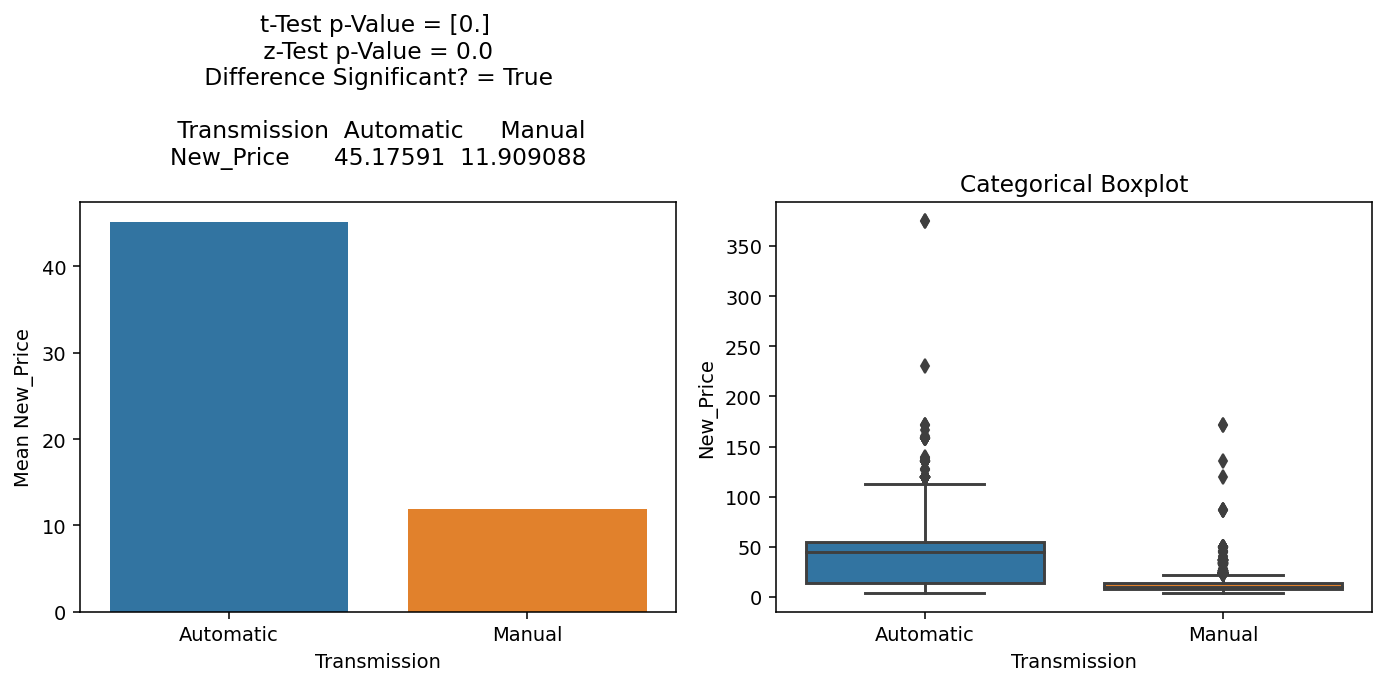

In [50]:
# Compare mean 'New_Price' between 'Automatic' and 'Manual' Tranmission

fn_Bivariate_cont_cat(used_cars_df, 'New_Price', 'Transmission', 'Automatic', 'Manual')

- Average Mean New_Price for 'Automatic' Transmission is more than 'Manual' Transmission
- p-value and t-Test value is zero that is less than alpha value (0.05)

**Inference: Average Mean New_Price for 'Automatic transmission is more and it is significant.**

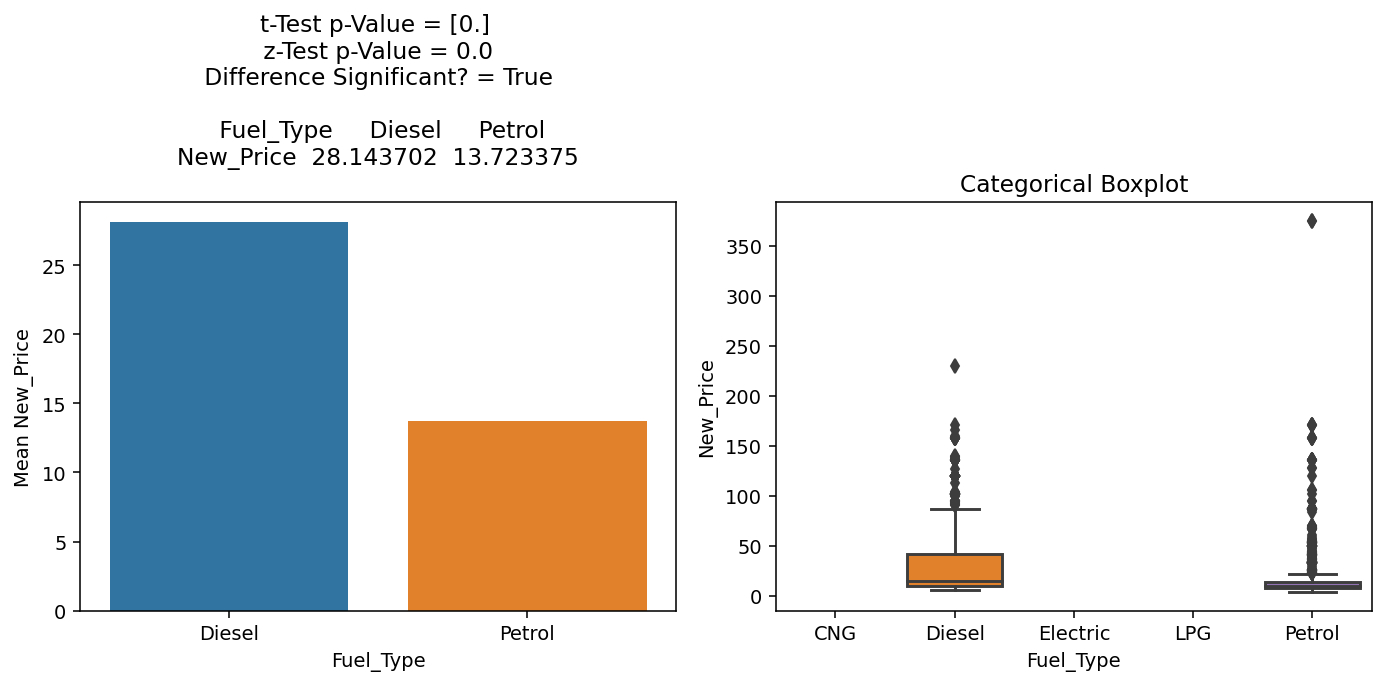

In [51]:
fn_Bivariate_cont_cat(used_cars_df[used_cars_df['Fuel_Type'].isin(['Petrol', 'Diesel'])], 
                      'New_Price', 'Fuel_Type', 'Diesel', 'Petrol')

- Average Mean New_Price for 'Diesel' fuel type is more than 'Petrol' fuel type
- p-value and t-Test value is zero that is less than alpha value (0.05)

**Inference: Average Mean New_Price for Diesel fuel type is more and it is significant.**

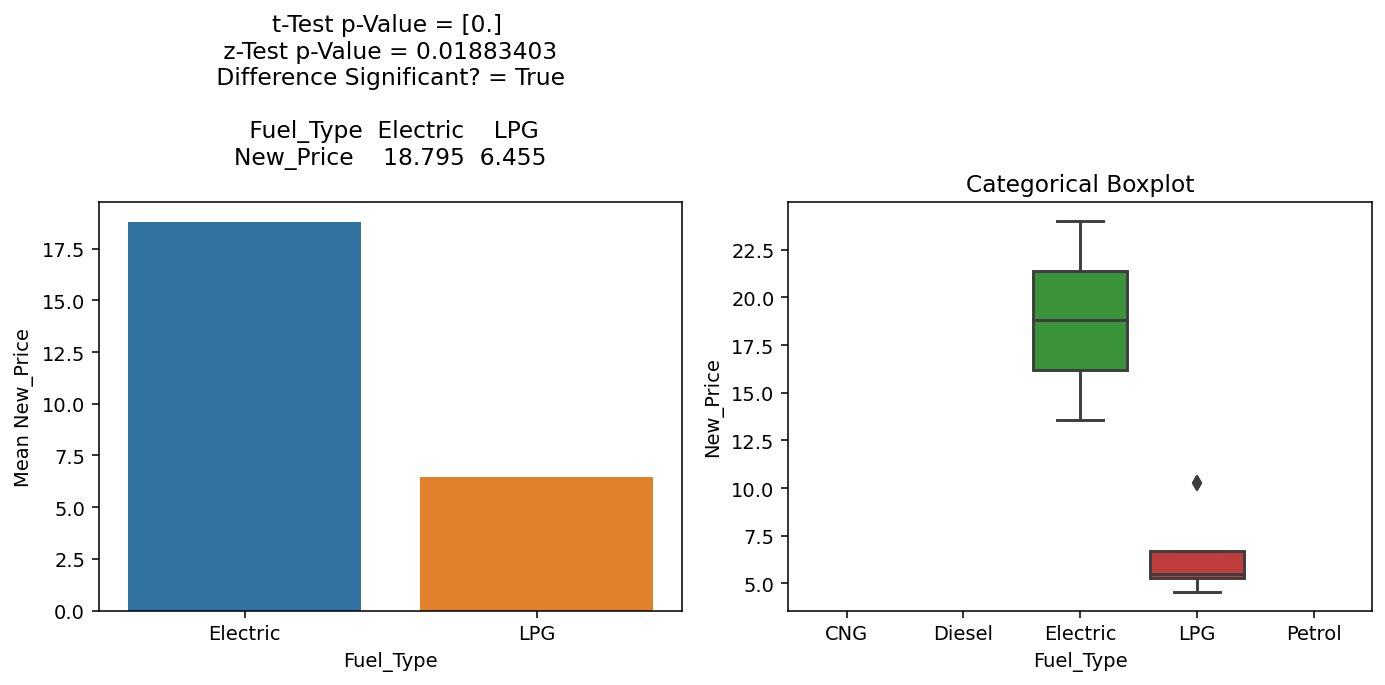

In [52]:
fn_Bivariate_cont_cat(used_cars_df[used_cars_df['Fuel_Type'].isin(['Electric', 'LPG'])], 
                      'New_Price', 'Fuel_Type', 'Electric', 'LPG')

- Average Mean New_Price for 'Electric' fuel type is more than 'LPG' fuel type
- p-value and t-Test value is less than alpha value (0.05)

**Inference: Average Mean New_Price for Electric fuel type is more and it is significant.**

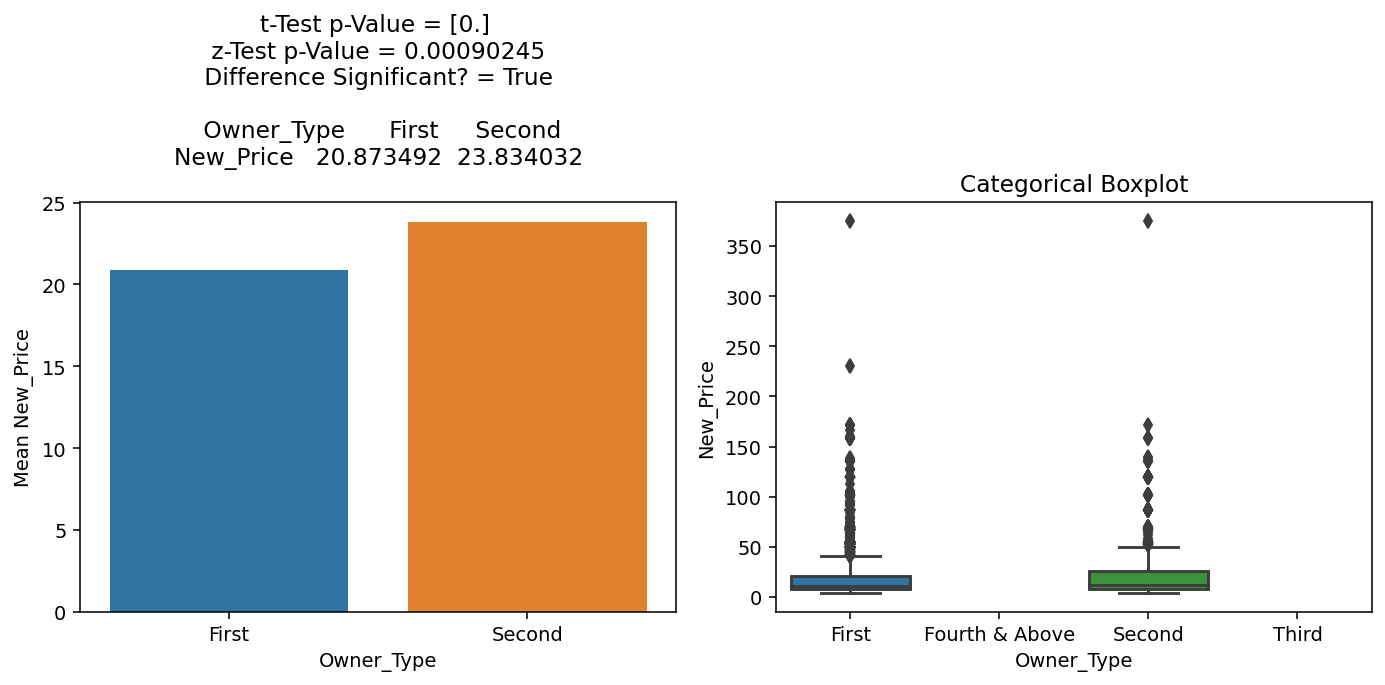

In [53]:
fn_Bivariate_cont_cat(used_cars_df[used_cars_df['Owner_Type'].isin(['First', 'Second'])], 
                      'New_Price', 'Owner_Type', 'First', 'Second')

- Average Mean New_Price for 'First' Owner type is more than 'Second' Owner type
- p-value and t-Test value is zero that is less than alpha value (0.05)

**Inference: Average Mean New_Price for First Owner type is less and it is significant.**

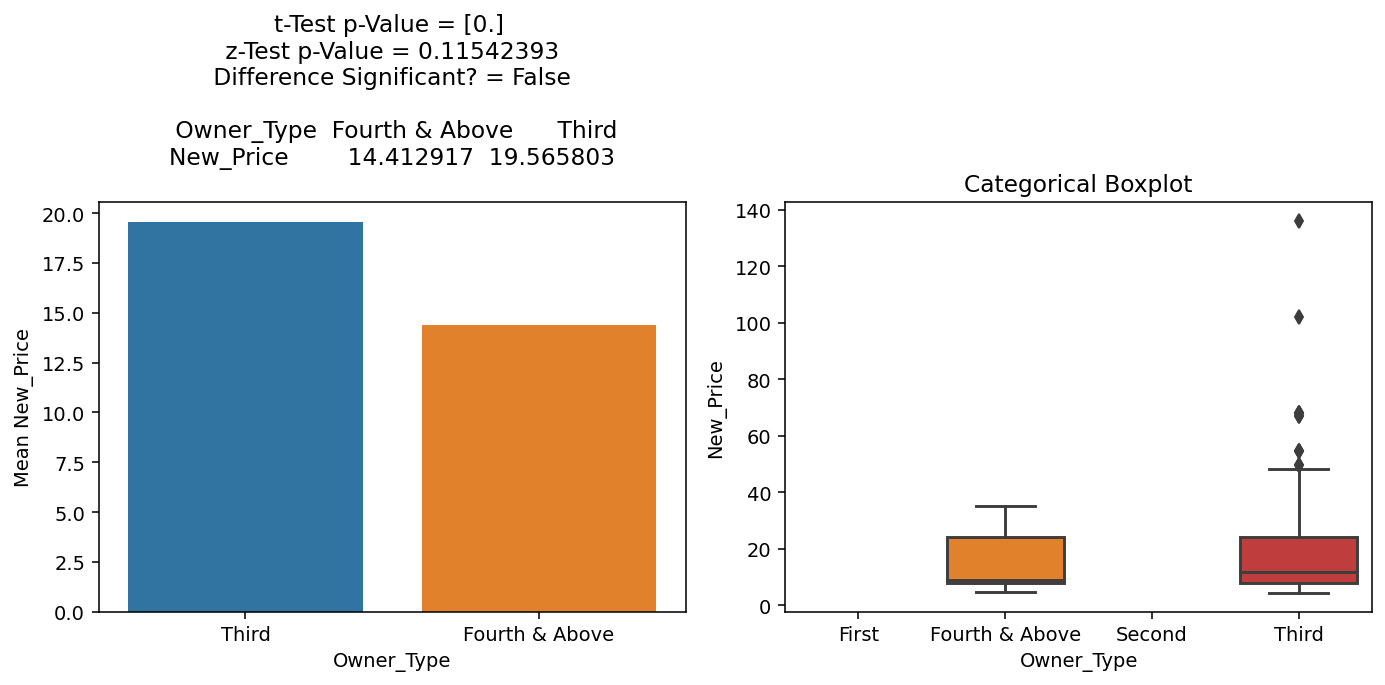

In [54]:
fn_Bivariate_cont_cat(used_cars_df[used_cars_df['Owner_Type'].isin(['Third', 'Fourth & Above'])], 
                      'New_Price', 'Owner_Type', 'Third', 'Fourth & Above')

- Average Mean New_Price for 'Third' Owner type is more than 'Fourth & Above' Owner type
- p-value and t-Test value is zero that is more than alpha value (0.05)

**Inference: Average Mean New_Price for Third Owner type is more and it is significant.**

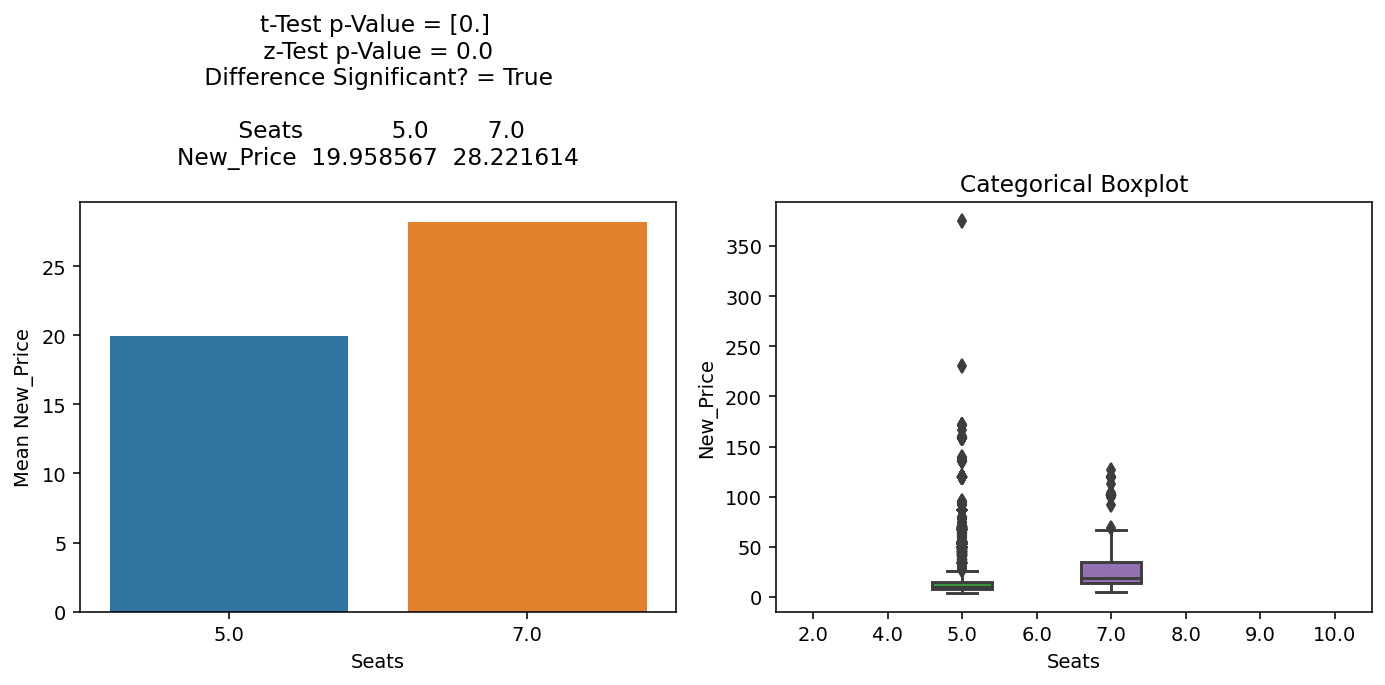

In [55]:
fn_Bivariate_cont_cat(used_cars_df[used_cars_df['Seats'].isin([5.0, 7.0])], 
                      'New_Price', 'Seats', 5.0, 7.0)

- Average Mean New_Price for '5.0' Seats type is more than '7.0' Seats type
- p-value and t-Test value is zero that is less than alpha value (0.05)

**Inference: Average Mean New_Price for 5.0 Seats type is less and it is significant.**

<Axes: xlabel='Seats', ylabel='New_Price'>

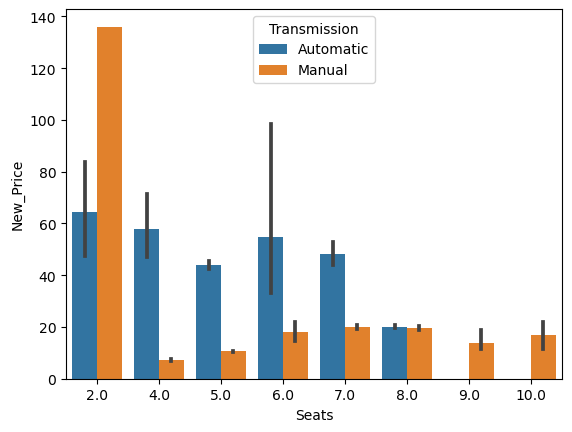

In [56]:
# Plot Distribution of 'Seats' and 'New_Price' for Automatic and Manual Transmission

sns.barplot(data = used_cars_df, x = 'Seats', y = 'New_Price', hue = 'Transmission')

<Axes: xlabel='Owner_Type', ylabel='New_Price'>

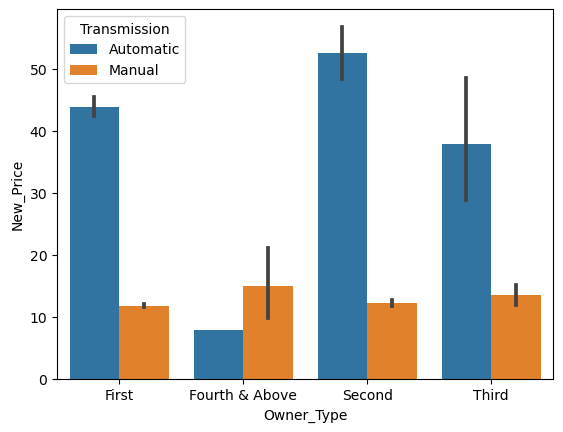

In [57]:
# Plot Distribution of 'Owner_Type' and 'New_Price' for Automatic and Manual Transmission

sns.barplot(x = 'Owner_Type', y = 'New_Price', data = used_cars_df, hue = 'Transmission')

<Axes: xlabel='Owner_Type', ylabel='New_Price'>

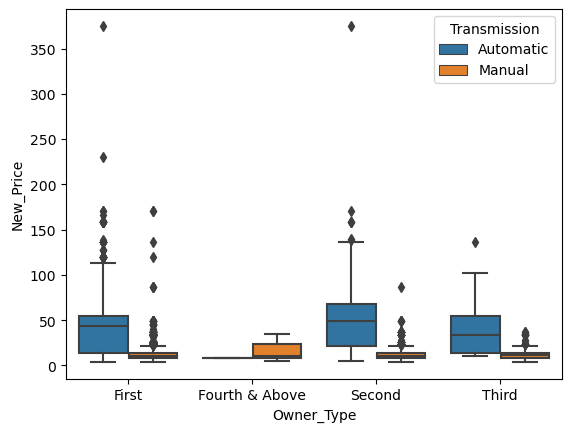

In [58]:
# Plot Distribution of 'Owner_Type' and 'New_Price' for Automatic and Manual Transmission

sns.boxplot(x = 'Owner_Type', y = 'New_Price', data = used_cars_df, hue = 'Transmission')

<Axes: xlabel='Fuel_Type', ylabel='New_Price'>

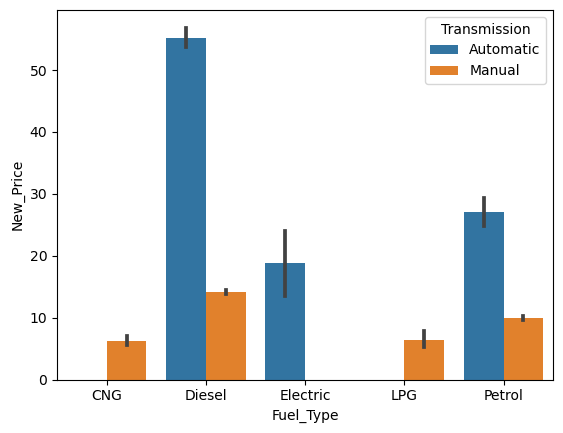

In [59]:
# Plot Distribution of 'Fuel_Type' and 'New_Price' for Automatic and Manual Transmission

sns.barplot(x = 'Fuel_Type', y = 'New_Price', data = used_cars_df, hue = 'Transmission')

<Axes: xlabel='Fuel_Type', ylabel='New_Price'>

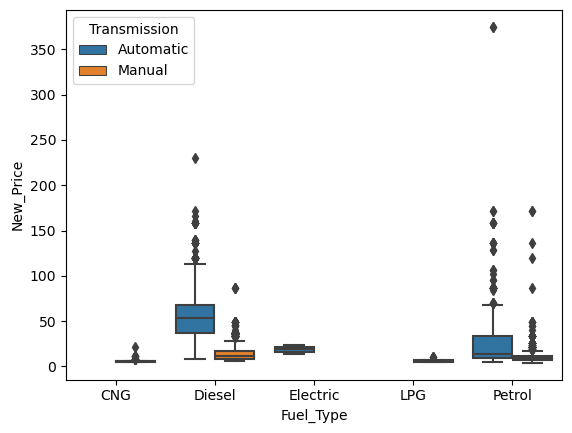

In [60]:
# Plot Distribution of 'Fuel_Type' and 'New_Price' for Automatic and Manual Transmission

sns.boxplot(x = 'Fuel_Type', y = 'New_Price', data = used_cars_df, hue = 'Transmission')

[Text(0, 0, 'Ahmedabad'),
 Text(1, 0, 'Bangalore'),
 Text(2, 0, 'Chennai'),
 Text(3, 0, 'Coimbatore'),
 Text(4, 0, 'Delhi'),
 Text(5, 0, 'Hyderabad'),
 Text(6, 0, 'Jaipur'),
 Text(7, 0, 'Kochi'),
 Text(8, 0, 'Kolkata'),
 Text(9, 0, 'Mumbai'),
 Text(10, 0, 'Pune')]

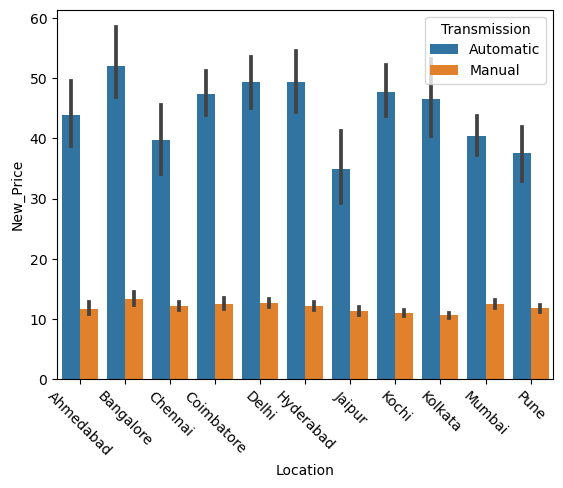

In [61]:
my_plot = sns.barplot(x = 'Location', y = 'New_Price', data = used_cars_df, hue = 'Transmission')
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=-45)

<Axes: xlabel='New_Price', ylabel='Brand'>

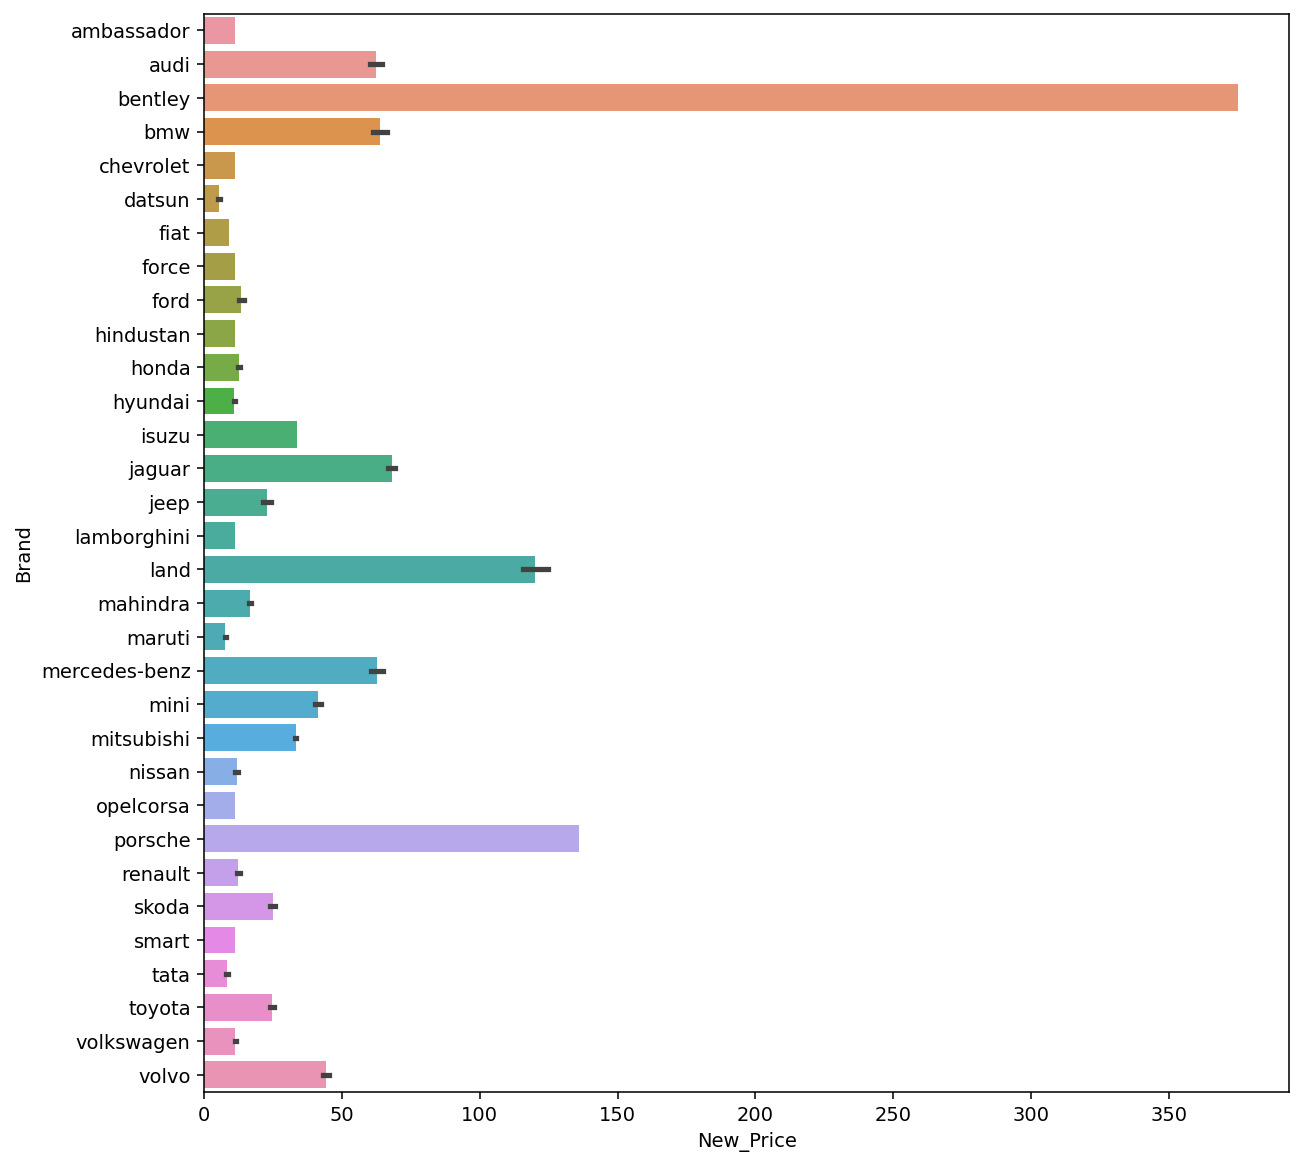

In [62]:
plt.figure(figsize = (10,10), dpi=140)

sns.barplot(y = 'Brand', x = 'New_Price', data = used_cars_df)

### 3.7 Multivariate Analysis<a id='3.7'></a>

In [63]:
# Derive distribution of 'Model' for 'Brand' and 'Location'

by_loc_brd_mod = used_cars_df.pivot_table('Model', 'Location', 'Brand', aggfunc = 'count')
by_loc_brd_mod

Brand       ambassador  audi  bentley  bmw  chevrolet  datsun  fiat  force  \
Location                                                                     
Ahmedabad            0    13        0   18          3       0     0      0   
Bangalore            0    40        1   30          9       2     0      0   
Chennai              1    11        0   29         17       2     2      1   
Coimbatore           0    56        0   41         16       1     4      0   
Delhi                0    31        0   24          3       0     1      0   
Hyderabad            0    38        1   37         12       1     2      0   
Jaipur               0     7        0    7         12       1     6      0   
Kochi                0    33        0   33         18       2     3      0   
Kolkata              0    17        0   14         19       4     8      2   
Mumbai               0    30        0   53         16       2     5      0   
Pune                 0     9        0   26         26       2     7      0   

Brand       ford  hindustan  ...  nissan  opelcorsa  porsche  renault  skoda  \
Location                     ...                                               
Ahmedabad      6          0  ...       2          0        0        5      7   
Bangalore     19          0  ...       1          0        2       15     11   
Chennai       55          0  ...      15          0        0        8      6   
Coimbatore    36          0  ...       9          0        3       15     14   
Delhi         20          0  ...       5          0        2       15     22   
Hyderabad     61          0  ...      16          1        2       17     30   
Jaipur        23          0  ...      11          0        0       23     12   
Kochi         34          0  ...      11          0        4       23     17   
Kolkata       28          0  ...      16          0        2        7     12   
Mumbai        42          0  ...      19          0        4       23     46   
Pune          27          1  ...      12          0        0       19     25   

Brand       smart  tata  toyota  volkswagen  volvo  
Location                                            
Ahmedabad       0    10      20          12      3  
Bangalore       0    10      26          17      3  
Chennai         0    26      52          43      3  
Coimbatore      0    25      44          35      2  
Delhi           0     8      78          21      3  
Hyderabad       0    34      70          45      7  
Jaipur          0    25      19          22      0  
Kochi           0    12      37          28      4  
Kolkata         0    20      33          45      0  
Mumbai          0    15      67          62      1  
Pune            1    43      61          44      2  

[11 rows x 32 columns]

Text(0.5, 0.98, 'Inventory of Brand By Location')

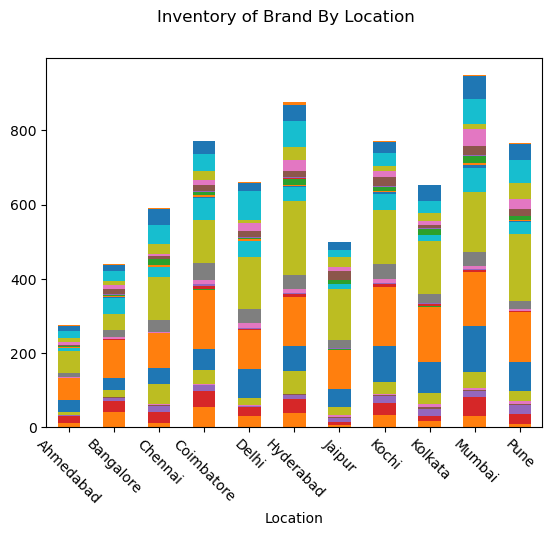

In [64]:
my_plot = by_loc_brd_mod.plot(kind="bar", stacked=True, rot=0)
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=-45)
plt.gca().get_legend().remove()
plt.suptitle('Inventory of Brand By Location')

In [65]:
# Derive distribution of 'Brand' for 'Location' and 'Model'

by_loc_brd_mod = used_cars_df.pivot_table('Brand', 'Location', 'Model', aggfunc = 'count')
by_loc_brd_mod

Model       1  1.4gsi  1000   3  370z   5  6  7  800  a  ...  xenon  xf  xj  \
Location                                                 ...                  
Ahmedabad   0       0     0   6     0   8  0  0    0  0  ...      0   0   0   
Bangalore   0       0     0  10     0   9  0  1    0  2  ...      1   3   0   
Chennai     0       0     0   9     0   3  0  4    1  2  ...      0   1   0   
Coimbatore  1       0     0  11     0  14  0  2    0  0  ...      0   7   1   
Delhi       0       0     0   5     0  11  2  0    0  1  ...      0   3   1   
Hyderabad   1       1     1  18     0   8  0  2    2  0  ...      1   5   2   
Jaipur      0       0     0   2     0   2  0  0    9  0  ...      1   0   0   
Kochi       0       0     0  11     0   9  3  3    0  2  ...      0   7   1   
Kolkata     0       0     0   5     1   4  0  1    1  0  ...      0   5   0   
Mumbai      0       0     0  24     0  10  4  3    0  3  ...      0   3   1   
Pune        1       0     0   8     0   8  0  1    2  2  ...      1   2   0   

Model       xuv300  xuv500  xylo  yeti  z4  zen  zest  
Location                                               
Ahmedabad        0       6     1     0   0    2     0  
Bangalore        0       7     2     0   0    1     1  
Chennai          1       7     6     1   0    2     1  
Coimbatore       0      26     4     0   0    0     2  
Delhi            0      18     0     0   1    2     1  
Hyderabad        0      10     5     2   0    5     1  
Jaipur           0       7     2     1   0    6     1  
Kochi            0      16     1     0   1    2     3  
Kolkata          0      11     2     1   0    2     5  
Mumbai           0      15     5     0   0    4     4  
Pune             0       8     2     1   0    7     5  

[11 rows x 218 columns]

Text(0.5, 0.98, 'Inventory of Model By Location')

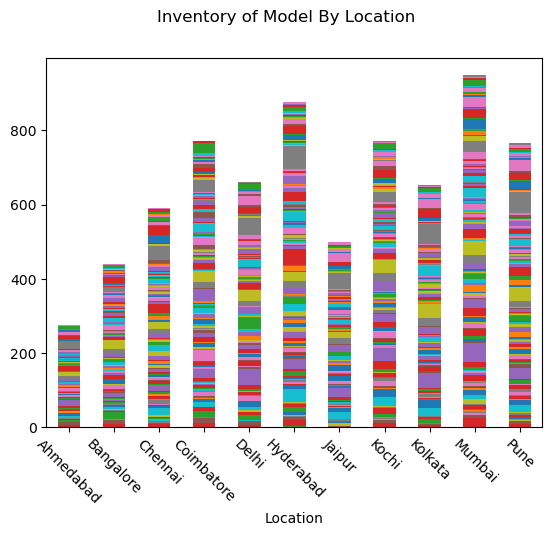

In [66]:
my_plot = by_loc_brd_mod.plot(kind="bar", stacked=True, rot=0)
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=-45)
plt.gca().get_legend().remove()
plt.suptitle('Inventory of Model By Location')

In [67]:
# Derive distribution of 'Brand' for 'Location' and 'Year'

by_brand_yr_loc = used_cars_df.pivot_table('Brand', 'Location', 'Year', aggfunc = 'count')
by_brand_yr_loc

Year        1996  1998  1999  2000  2001  2002  2003  2004  2005  2006  ...  \
Location                                                                ...   
Ahmedabad      0     0     0     0     0     1     0     1     2     0  ...   
Bangalore      0     0     0     0     0     2     0     1     6     6  ...   
Chennai        0     0     0     0     2     7     7     6    10    22  ...   
Coimbatore     0     0     0     0     0     0     0     2     1     0  ...   
Delhi          0     0     0     0     0     0     0     0     1     7  ...   
Hyderabad      0     1     0     1     0     1     1     5    11    13  ...   
Jaipur         0     2     1     2     2     2     2     6     9    13  ...   
Kochi          0     0     0     0     0     0     1     1     0     3  ...   
Kolkata        0     0     0     1     0     2     1     0     6     1  ...   
Mumbai         0     1     0     0     1     1     3     3     9     9  ...   
Pune           1     0     1     1     3     2     5    10    13    15  ...   

Year        2010  2011  2012  2013  2014  2015  2016  2017  2018  2019  
Location                                                                
Ahmedabad     12    19    30    34    44    41    31    22     9     1  
Bangalore     21    39    47    62    81    59    55    14     5     0  
Chennai       38    67    69    48    50    64    75    28     9     4  
Coimbatore    10    28    40    54    71   100   147   151    96    52  
Delhi         37    67    88    95   117    90    65    48    14     1  
Hyderabad     67    73   101   112   100   105    91    70    17     1  
Jaipur        33    40    45    50    56    63    50    52    13     1  
Kochi         13    30    40    49    85   121   122   135   115    50  
Kolkata       50    63    68    97   101    88    60    42    22     4  
Mumbai        61    83    66   101   138   126   117    99    38     3  
Pune          64    70    96    89    82    72    73    48    23     2  

[11 rows x 23 columns]

Text(0.5, 0.98, 'Inventory of Brand By Location')

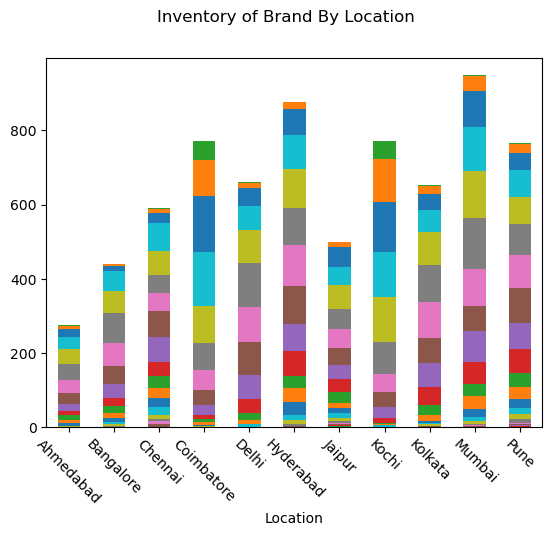

In [68]:
my_plot = by_brand_yr_loc.plot(kind="bar", stacked=True, rot=0)
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=-45)
plt.gca().get_legend().remove()
plt.suptitle('Inventory of Brand By Location')

In [69]:
# Derive distribution of 'Model' for 'Location' and 'Transmission & Fuel Type'

by_loc_fuel_trans = used_cars_df.pivot_table('Model', 'Location', ['Transmission','Fuel_Type'], aggfunc = 'count')
by_loc_fuel_trans

Transmission Automatic                            Manual                      \
Fuel_Type          CNG Diesel Electric LPG Petrol    CNG Diesel Electric LPG   
Location                                                                       
Ahmedabad            0     55        0   0     17      3    114        0   0   
Bangalore            0    137        0   0     42      1    136        0   0   
Chennai              0     91        1   0     44      2    250        0   0   
Coimbatore           0    210        0   0     93      0    220        0   0   
Delhi                0    140        0   0     64     12    221        0   0   
Hyderabad            0    176        0   0     56      3    417        0   6   
Jaipur               0     43        0   0     19      0    233        0   4   
Kochi                0    150        0   0     95      9    208        0   0   
Kolkata              0     48        0   0     40      1    268        0   0   
Mumbai               0    169        1   0    189     18    202        0   1   
Pune                 0     98        0   0     71     13    266        0   1   

Transmission         
Fuel_Type    Petrol  
Location             
Ahmedabad        86  
Bangalore       124  
Chennai         203  
Coimbatore      249  
Delhi           223  
Hyderabad       218  
Jaipur          200  
Kochi           310  
Kolkata         297  
Mumbai          368  
Pune            316

In [70]:
# Derive distribution of 'New Price' for 'Location' and 'Brand'

by_loc_brand_np = used_cars_df.pivot_table('New_Price', 'Location', 'Brand', aggfunc = 'sum')
by_loc_brand_np

Brand       ambassador     audi  bentley      bmw  chevrolet  datsun    fiat  \
Location                                                                       
Ahmedabad          0.0   718.58      0.0  1042.03       33.9   0.000   0.000   
Bangalore          0.0  2379.34    375.0  1919.76      101.7  10.005   0.000   
Chennai           11.3   577.76      0.0  2032.90      192.1   9.960  17.675   
Coimbatore         0.0  3875.82      0.0  2658.26      180.8   4.040  36.485   
Delhi              0.0  1824.44      0.0  1436.64       33.9   0.000   9.075   
Hyderabad          0.0  2316.60    375.0  2338.79      135.6   6.095  17.860   
Jaipur             0.0   346.96      0.0   396.03      135.6   3.990  54.400   
Kochi              0.0  2130.66      0.0  2237.39      203.4   8.100  26.275   
Kolkata            0.0   964.84      0.0   906.47      214.7  22.265  71.885   
Mumbai             0.0  1949.30      0.0  3324.73      180.8  12.440  45.560   
Pune               0.0   656.22      0.0  1634.30      293.8  12.545  63.420   

Brand       force     ford  hindustan  ...  nissan  opelcorsa  porsche  \
Location                               ...                               
Ahmedabad     0.0   57.955        0.0  ...   16.25        0.0      0.0   
Bangalore     0.0  217.375        0.0  ...   16.65        0.0    272.0   
Chennai      11.3  740.655        0.0  ...  166.48        0.0      0.0   
Coimbatore    0.0  508.685        0.0  ...   90.78        0.0    408.0   
Delhi         0.0  280.090        0.0  ...   51.07        0.0    272.0   
Hyderabad     0.0  840.080        0.0  ...  194.79       11.3    272.0   
Jaipur        0.0  291.940        0.0  ...  133.15        0.0      0.0   
Kochi         0.0  568.235        0.0  ...  138.74        0.0    544.0   
Kolkata      22.6  257.315        0.0  ...  174.44        0.0    272.0   
Mumbai        0.0  588.895        0.0  ...  267.18        0.0    544.0   
Pune          0.0  363.020       11.3  ...  136.85        0.0      0.0   

Brand       renault    skoda  smart     tata    toyota  volkswagen   volvo  
Location                                                                    
Ahmedabad     64.98   162.58    0.0   75.340   475.590     134.285  137.01  
Bangalore    205.17   256.83    0.0   96.200   623.135     191.030  121.47  
Chennai      101.64   131.76    0.0  196.400  1248.185     500.310  129.24  
Coimbatore   206.79   290.46    0.0  208.890   980.475     365.840   91.34  
Delhi        204.65   622.97    0.0   81.580  2133.010     220.020  137.01  
Hyderabad    205.04   728.58    0.0  274.095  1798.760     496.915  311.92  
Jaipur       249.17   295.12    0.0  230.370   528.405     273.645    0.00  
Kochi        231.29   424.95    0.0   96.090   843.160     316.630  182.68  
Kolkata       95.08   298.84    0.0  152.130   618.510     482.620    0.00  
Mumbai       294.80  1164.74    0.0  116.880  1733.005     709.755   45.67  
Pune         240.88   629.69   11.3  341.900  1471.440     508.830   83.57  

[11 rows x 32 columns]

Text(0.5, 0.98, '$Inventory of Brand By Location')

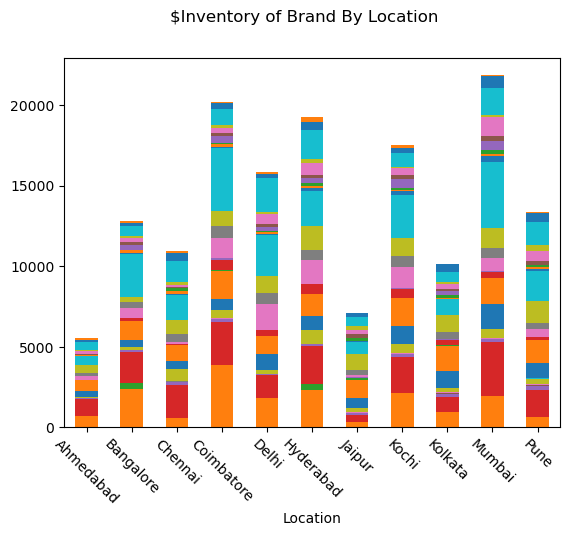

In [71]:
my_plot = by_loc_brand_np.plot(kind="bar", stacked=True, rot=0)
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=-45)
plt.gca().get_legend().remove()
plt.suptitle('$Inventory of Brand By Location')

In [72]:
# Derive distribution of 'New Price' for 'Year' and 'Location'

by_loc_yr_np = used_cars_df.pivot_table('New_Price', 'Year', 'Location', aggfunc = 'sum')
by_loc_yr_np

Location  Ahmedabad  Bangalore   Chennai  Coimbatore     Delhi  Hyderabad  \
Year                                                                        
1996          0.000      0.000     0.000       0.000     0.000      0.000   
1998          0.000      0.000     0.000       0.000     0.000      7.880   
1999          0.000      0.000     0.000       0.000     0.000      0.000   
2000          0.000      0.000     0.000       0.000     0.000      7.630   
2001          0.000      0.000    37.760       0.000     0.000      0.000   
2002         13.580     37.590    56.440       0.000     0.000     25.830   
2003          0.000      0.000   273.440       0.000     0.000     25.830   
2004          5.510      4.550    87.550      18.130     0.000     63.630   
2005         12.430    158.215   175.670      21.085     7.880    209.480   
2006          0.000    120.020   262.755       0.000   159.690    607.405   
2007         53.820    178.630   520.905     185.800    13.390    543.395   
2008        269.390    569.420   427.240     225.985   256.450    672.090   
2009        278.390    597.985   677.000     232.235   309.240   1001.340   
2010        279.045    467.590   787.125     406.270   711.595   1738.610   
2011        449.530   1231.065  1239.025     606.970  1975.535   1717.715   
2012        828.705   1086.570  1146.725    1051.280  2048.605   2507.050   
2013        606.740   1823.505   856.065    1172.705  2697.760   2521.050   
2014        833.985   2556.290  1256.485    2048.390  2982.735   1893.350   
2015        735.215   1895.765  1059.030    2476.550  1726.610   2559.930   
2016        763.135   1410.975  1213.670    3960.085  1487.450   1549.665   
2017        253.330    566.995   660.020    3673.080  1065.180   1356.610   
2018        116.390     91.580    76.115    2704.945   336.420    255.630   
2019         49.140      0.000   113.750    1435.890    52.460      6.740   

Location   Jaipur     Kochi   Kolkata    Mumbai      Pune  
Year                                                       
1996        0.000     0.000     0.000     0.000    11.300  
1998       15.760     0.000     0.000    86.970     0.000  
1999        7.880     0.000     0.000     0.000    13.580  
2000       15.760     0.000    11.010     0.000     7.880  
2001       14.585     0.000     0.000    24.010   110.800  
2002       15.760     0.000    30.380     7.880    29.520  
2003       13.390     7.880     7.880   214.850    33.985  
2004       57.155   171.000     0.000   131.480   115.405  
2005      113.660     0.000   115.780   206.800   140.620  
2006      146.020    32.630    13.580   316.405   126.090  
2007      173.040     4.550    95.800   515.800   341.010  
2008      249.275    15.850   187.070  1186.475   728.490  
2009      387.125   126.490   659.175   862.385   789.770  
2010      405.815   382.320   995.685  1299.800  1050.705  
2011      522.360   689.390   917.015  2435.400  1331.395  
2012      746.130   756.580  1355.745  1584.595  1793.525  
2013      840.375  1100.245  1376.170  3032.845  1680.770  
2014      958.215  2456.900  1441.665  2531.530  1491.625  
2015      896.970  3403.795  1354.700  2537.110  1344.605  
2016      634.675  2301.365   658.190  2213.065   914.410  
2017      751.225  2375.990   597.350  1934.695   848.500  
2018      126.710  2452.165   246.260   702.540   437.435  
2019        4.360  1234.990    57.810    18.810    20.800

Text(0.5, 0.98, '$Inventory By Year By Location')

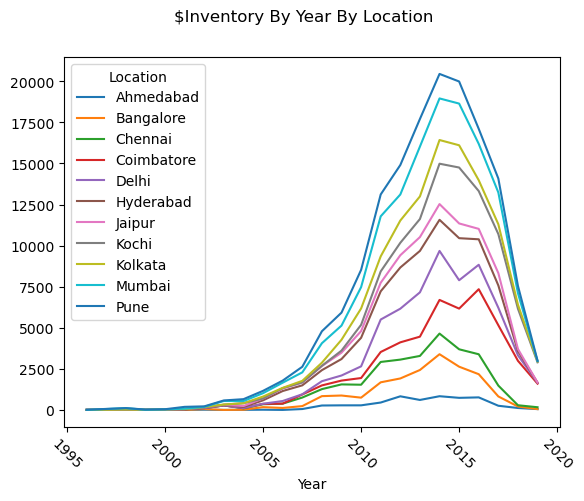

In [73]:
my_plot = by_loc_yr_np.plot(kind="line", stacked=True, rot=0)
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=-45)
#plt.gca().get_legend().remove()
plt.suptitle('$Inventory By Year By Location')

In [74]:
# Derive distribution of 'New Price' for 'Year' and 'Brand'

by_brand_yr = used_cars_df.pivot_table('New_Price', 'Year', 'Brand', aggfunc = 'mean')
by_brand_yr

Brand  ambassador       audi  bentley        bmw  chevrolet    datsun  \
Year                                                                    
1996          NaN        NaN      NaN        NaN        NaN       NaN   
1998          NaN        NaN      NaN        NaN        NaN       NaN   
1999          NaN        NaN      NaN        NaN        NaN       NaN   
2000          NaN        NaN      NaN        NaN        NaN       NaN   
2001          NaN        NaN      NaN        NaN        NaN       NaN   
2002          NaN        NaN      NaN        NaN        NaN       NaN   
2003         11.3        NaN      NaN        NaN        NaN       NaN   
2004          NaN        NaN      NaN        NaN       11.3       NaN   
2005          NaN        NaN      NaN        NaN       11.3       NaN   
2006          NaN        NaN    375.0  67.870000       11.3       NaN   
2007          NaN        NaN      NaN  93.433333       11.3       NaN   
2008          NaN  80.045714    375.0  70.163000       11.3       NaN   
2009          NaN  61.190769      NaN  67.359565       11.3       NaN   
2010          NaN  64.102857      NaN  67.649091       11.3       NaN   
2011          NaN  58.178889      NaN  58.960556       11.3       NaN   
2012          NaN  61.078621      NaN  61.171892       11.3       NaN   
2013          NaN  58.282609      NaN  67.773171       11.3       NaN   
2014          NaN  63.087213      NaN  60.594062       11.3       NaN   
2015          NaN  62.578393      NaN  61.080278       11.3  6.220000   
2016          NaN  66.817600      NaN  60.672727       11.3  5.420556   
2017          NaN  60.494286      NaN  66.710417       11.3  5.375000   
2018          NaN  60.272857      NaN  69.604545       11.3  4.030000   
2019          NaN  72.260000      NaN  56.170000        NaN       NaN   

Brand      fiat  force       ford  hindustan  ...     nissan  opelcorsa  \
Year                                          ...                         
1996        NaN    NaN        NaN       11.3  ...        NaN        NaN   
1998        NaN    NaN        NaN        NaN  ...        NaN        NaN   
1999        NaN    NaN        NaN        NaN  ...        NaN        NaN   
2000        NaN    NaN        NaN        NaN  ...        NaN        NaN   
2001   9.075000    NaN        NaN        NaN  ...        NaN        NaN   
2002        NaN    NaN  11.685000        NaN  ...        NaN        NaN   
2003        NaN    NaN  11.685000        NaN  ...        NaN        NaN   
2004        NaN    NaN  11.685000        NaN  ...        NaN        NaN   
2005   9.075000    NaN  11.685000        NaN  ...        NaN       11.3   
2006        NaN    NaN  11.685000        NaN  ...        NaN        NaN   
2007        NaN    NaN  18.174643        NaN  ...        NaN        NaN   
2008        NaN    NaN  15.976818        NaN  ...  11.330000        NaN   
2009   9.075000    NaN  13.830909        NaN  ...  11.330000        NaN   
2010   8.885000    NaN  11.344138        NaN  ...  10.090000        NaN   
2011   9.007143    NaN  13.665185        NaN  ...   9.792667        NaN   
2012        NaN    NaN  13.515741        NaN  ...  10.564444        NaN   
2013   9.287500    NaN  10.379559        NaN  ...  11.932692        NaN   
2014   8.995000   11.3  10.861531        NaN  ...  14.397273        NaN   
2015   9.167500    NaN   9.967969        NaN  ...  13.882857        NaN   
2016   9.002500    NaN  15.015172        NaN  ...  11.398750        NaN   
2017   8.837500    NaN  14.426395        NaN  ...   8.600000        NaN   
2018   9.260000    NaN  19.363636        NaN  ...   8.230000        NaN   
2019   9.260000    NaN  25.988125        NaN  ...        NaN        NaN   

Brand  porsche    renault      skoda  smart      tata     toyota  volkswagen  \
Year                                                                           
1996       NaN        NaN        NaN    NaN       NaN        NaN         NaN   
1998       NaN        NaN        NaN    NaN       NaN     

Text(0.5, 0.98, 'Avg New Price By Year By Brand')

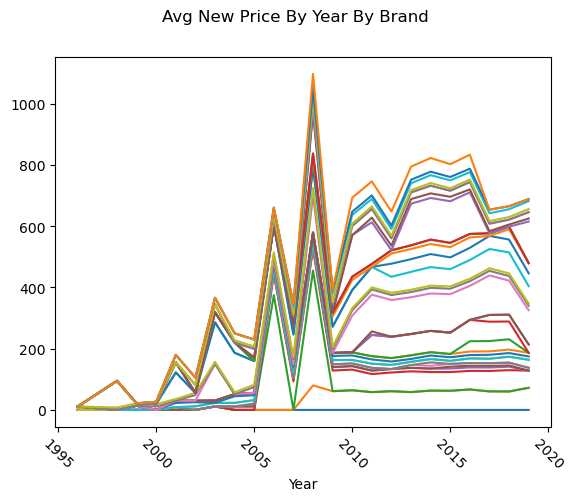

In [75]:
my_plot = by_brand_yr.plot(kind="line", stacked=True, rot=0)
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=-45)
plt.gca().get_legend().remove()
plt.suptitle('Avg New Price By Year By Brand')

In [76]:
# Derive distribution of 'New Price' for 'Year' and 'Location'

by_location_yr = used_cars_df.pivot_table('New_Price', 'Year', 'Location', aggfunc = 'mean')
by_brand_yr

Brand  ambassador       audi  bentley        bmw  chevrolet    datsun  \
Year                                                                    
1996          NaN        NaN      NaN        NaN        NaN       NaN   
1998          NaN        NaN      NaN        NaN        NaN       NaN   
1999          NaN        NaN      NaN        NaN        NaN       NaN   
2000          NaN        NaN      NaN        NaN        NaN       NaN   
2001          NaN        NaN      NaN        NaN        NaN       NaN   
2002          NaN        NaN      NaN        NaN        NaN       NaN   
2003         11.3        NaN      NaN        NaN        NaN       NaN   
2004          NaN        NaN      NaN        NaN       11.3       NaN   
2005          NaN        NaN      NaN        NaN       11.3       NaN   
2006          NaN        NaN    375.0  67.870000       11.3       NaN   
2007          NaN        NaN      NaN  93.433333       11.3       NaN   
2008          NaN  80.045714    375.0  70.163000       11.3       NaN   
2009          NaN  61.190769      NaN  67.359565       11.3       NaN   
2010          NaN  64.102857      NaN  67.649091       11.3       NaN   
2011          NaN  58.178889      NaN  58.960556       11.3       NaN   
2012          NaN  61.078621      NaN  61.171892       11.3       NaN   
2013          NaN  58.282609      NaN  67.773171       11.3       NaN   
2014          NaN  63.087213      NaN  60.594062       11.3       NaN   
2015          NaN  62.578393      NaN  61.080278       11.3  6.220000   
2016          NaN  66.817600      NaN  60.672727       11.3  5.420556   
2017          NaN  60.494286      NaN  66.710417       11.3  5.375000   
2018          NaN  60.272857      NaN  69.604545       11.3  4.030000   
2019          NaN  72.260000      NaN  56.170000        NaN       NaN   

Brand      fiat  force       ford  hindustan  ...     nissan  opelcorsa  \
Year                                          ...                         
1996        NaN    NaN        NaN       11.3  ...        NaN        NaN   
1998        NaN    NaN        NaN        NaN  ...        NaN        NaN   
1999        NaN    NaN        NaN        NaN  ...        NaN        NaN   
2000        NaN    NaN        NaN        NaN  ...        NaN        NaN   
2001   9.075000    NaN        NaN        NaN  ...        NaN        NaN   
2002        NaN    NaN  11.685000        NaN  ...        NaN        NaN   
2003        NaN    NaN  11.685000        NaN  ...        NaN        NaN   
2004        NaN    NaN  11.685000        NaN  ...        NaN        NaN   
2005   9.075000    NaN  11.685000        NaN  ...        NaN       11.3   
2006        NaN    NaN  11.685000        NaN  ...        NaN        NaN   
2007        NaN    NaN  18.174643        NaN  ...        NaN        NaN   
2008        NaN    NaN  15.976818        NaN  ...  11.330000        NaN   
2009   9.075000    NaN  13.830909        NaN  ...  11.330000        NaN   
2010   8.885000    NaN  11.344138        NaN  ...  10.090000        NaN   
2011   9.007143    NaN  13.665185        NaN  ...   9.792667        NaN   
2012        NaN    NaN  13.515741        NaN  ...  10.564444        NaN   
2013   9.287500    NaN  10.379559        NaN  ...  11.932692        NaN   
2014   8.995000   11.3  10.861531        NaN  ...  14.397273        NaN   
2015   9.167500    NaN   9.967969        NaN  ...  13.882857        NaN   
2016   9.002500    NaN  15.015172        NaN  ...  11.398750        NaN   
2017   8.837500    NaN  14.426395        NaN  ...   8.600000        NaN   
2018   9.260000    NaN  19.363636        NaN  ...   8.230000        NaN   
2019   9.260000    NaN  25.988125        NaN  ...        NaN        NaN   

Brand  porsche    renault      skoda  smart      tata     toyota  volkswagen  \
Year                                                                           
1996       NaN        NaN        NaN    NaN       NaN        NaN         NaN   
1998       NaN        NaN        NaN    NaN       NaN     

Text(0.5, 0.98, 'Avg New Price By Year By Location')

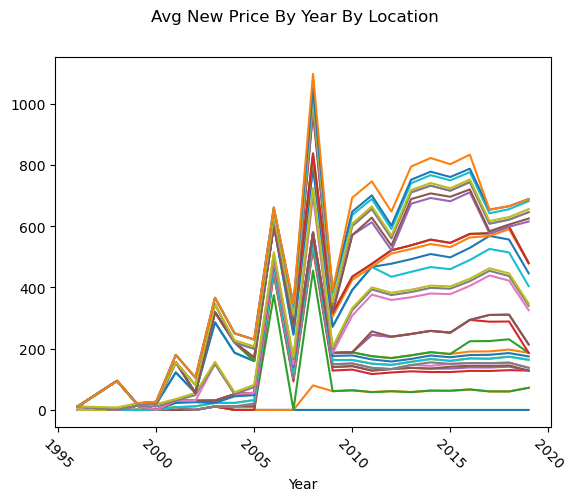

In [77]:
my_plot = by_brand_yr.plot(kind="line", stacked=True, rot=0)
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=-45)
plt.gca().get_legend().remove()
plt.suptitle('Avg New Price By Year By Location')

In [78]:
# Derive distribution of 'New Price' for 'Year' and 'Transmission'

by_trans_yr = used_cars_df.pivot_table('New_Price', 'Year', 'Transmission', aggfunc = 'mean')
by_trans_yr

Transmission   Automatic     Manual
Year                               
1996                 NaN  11.300000
1998           86.970000   7.880000
1999                 NaN  10.730000
2000                 NaN   8.456000
2001                 NaN  23.394375
2002                 NaN  12.054444
2003          125.990000  11.722647
2004           61.193333   9.905172
2005           42.360833  11.665893
2006           67.375455  13.377756
2007           38.651364  14.093730
2008           56.735745  13.257219
2009           46.115185  12.782485
2010           51.510170  12.552406
2011           47.771563  13.059547
2012           50.576724  11.831705
2013           49.461239  12.086702
2014           47.091038  12.078856
2015           45.376204  11.537710
2016           38.881041  10.774206
2017           37.747155  11.164853
2018           38.832879  10.568777
2019           41.072407  11.951385

Text(0.5, 0.98, 'Avg New Price By Year By Transmission')

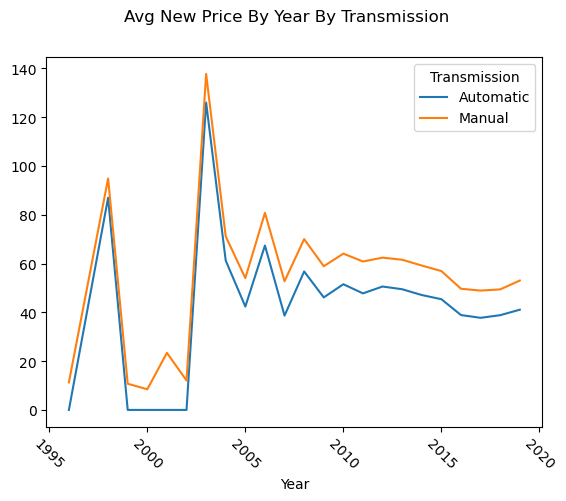

In [79]:
my_plot = by_trans_yr.plot(kind="line", stacked=True, rot=0)
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=-45)
plt.suptitle('Avg New Price By Year By Transmission')

In [80]:
by_trans_yr = used_cars_df.pivot_table('New_Price', 'Year', 'Transmission', aggfunc = 'mean')
by_trans_yr

Transmission   Automatic     Manual
Year                               
1996                 NaN  11.300000
1998           86.970000   7.880000
1999                 NaN  10.730000
2000                 NaN   8.456000
2001                 NaN  23.394375
2002                 NaN  12.054444
2003          125.990000  11.722647
2004           61.193333   9.905172
2005           42.360833  11.665893
2006           67.375455  13.377756
2007           38.651364  14.093730
2008           56.735745  13.257219
2009           46.115185  12.782485
2010           51.510170  12.552406
2011           47.771563  13.059547
2012           50.576724  11.831705
2013           49.461239  12.086702
2014           47.091038  12.078856
2015           45.376204  11.537710
2016           38.881041  10.774206
2017           37.747155  11.164853
2018           38.832879  10.568777
2019           41.072407  11.951385